### LOADING DATA

In [2]:
# importing all necessary libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
#loading and reading the file
data = pd.read_excel('Warm_Up_Predict_Blood_Donations_-_Traning_Data.xlsx')
data

,Unnamed: 0,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation,Made Donation in March 2007
0,619,2,50,12500,98,1
1,664,0,13,3250,28,1
2,441,1,16,4000,35,1
3,160,2,20,5000,45,1
4,358,1,24,6000,77,0
...,...,...,...,...,...,...
571,698,23,1,250,23,0
572,433,16,3,750,86,0
573,360,21,2,500,52,0
574,541,39,1,250,39,0


### BASIC CHECK

In [4]:
data.head()

,Unnamed: 0,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation,Made Donation in March 2007
0,619,2,50,12500,98,1
1,664,0,13,3250,28,1
2,441,1,16,4000,35,1
3,160,2,20,5000,45,1
4,358,1,24,6000,77,0


In [5]:
data.info()
# there is no null values in the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 576 entries, 0 to 575
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Unnamed: 0                   576 non-null    int64
 1   Months since Last Donation   576 non-null    int64
 2   Number of Donations          576 non-null    int64
 3   Total Volume Donated (c.c.)  576 non-null    int64
 4   Months since First Donation  576 non-null    int64
 5   Made Donation in March 2007  576 non-null    int64
dtypes: int64(6)
memory usage: 27.1 KB


In [6]:
# DESCRIPTION
data.describe()
#people donated more blood during 2nd donation than 1st donation
# 75% of people didn't donate the blood in 2007
# as the blood donor increased the volume of the blood is also increased
# every donar has donated 250ml(250c.c) blood at a time

,Unnamed: 0,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation,Made Donation in March 2007
count,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000
mean,374.034722,9.439236,5.427083,1356.770833,34.050347,0.239583
std,216.947773,8.175454,5.740010,1435.002556,24.227672,0.427200
min,0.000000,0.000000,1.000000,250.000000,2.000000,0.000000
25%,183.750000,2.000000,2.000000,500.000000,16.000000,0.000000
50%,375.500000,7.000000,4.000000,1000.000000,28.000000,0.000000
75%,562.500000,14.000000,7.000000,1750.000000,49.250000,0.000000
max,747.000000,74.000000,50.000000,12500.000000,98.000000,1.000000


In [7]:
# RENAMING THE COLUMNS
data.rename( {'Months since Last Donation':'month_since_last_donation',
             'Number of Donations':'no_of_donation','Total Volume Donated (c.c.)':'donated_volume',
            'Months since First Donation':'month_since_first_donation','Made Donation in March 2007':'target'},axis=1,inplace=True)

# PLOTS

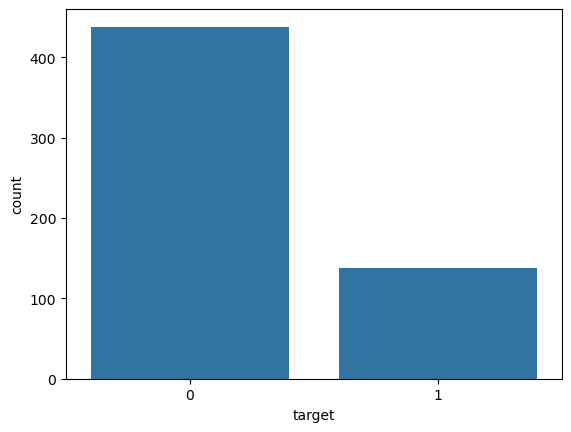

In [8]:
# COUNT PLOT
sns.countplot(x='target',data=data)
plt.show()
# 76%(436 of 576) have not donated since last donation

In [9]:
data.target.value_counts()

target
0    438
1    138
Name: count, dtype: int64

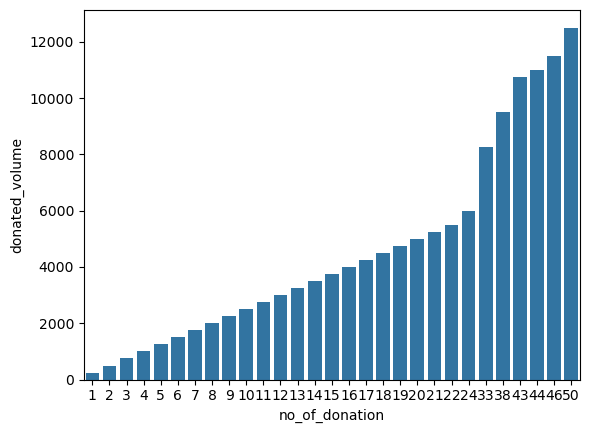

In [10]:
# BAR PLOT
sns.barplot(x='no_of_donation',y='donated_volume',data=data)
plt.show()
# as the no of donation increases the volume of blood is also increases.

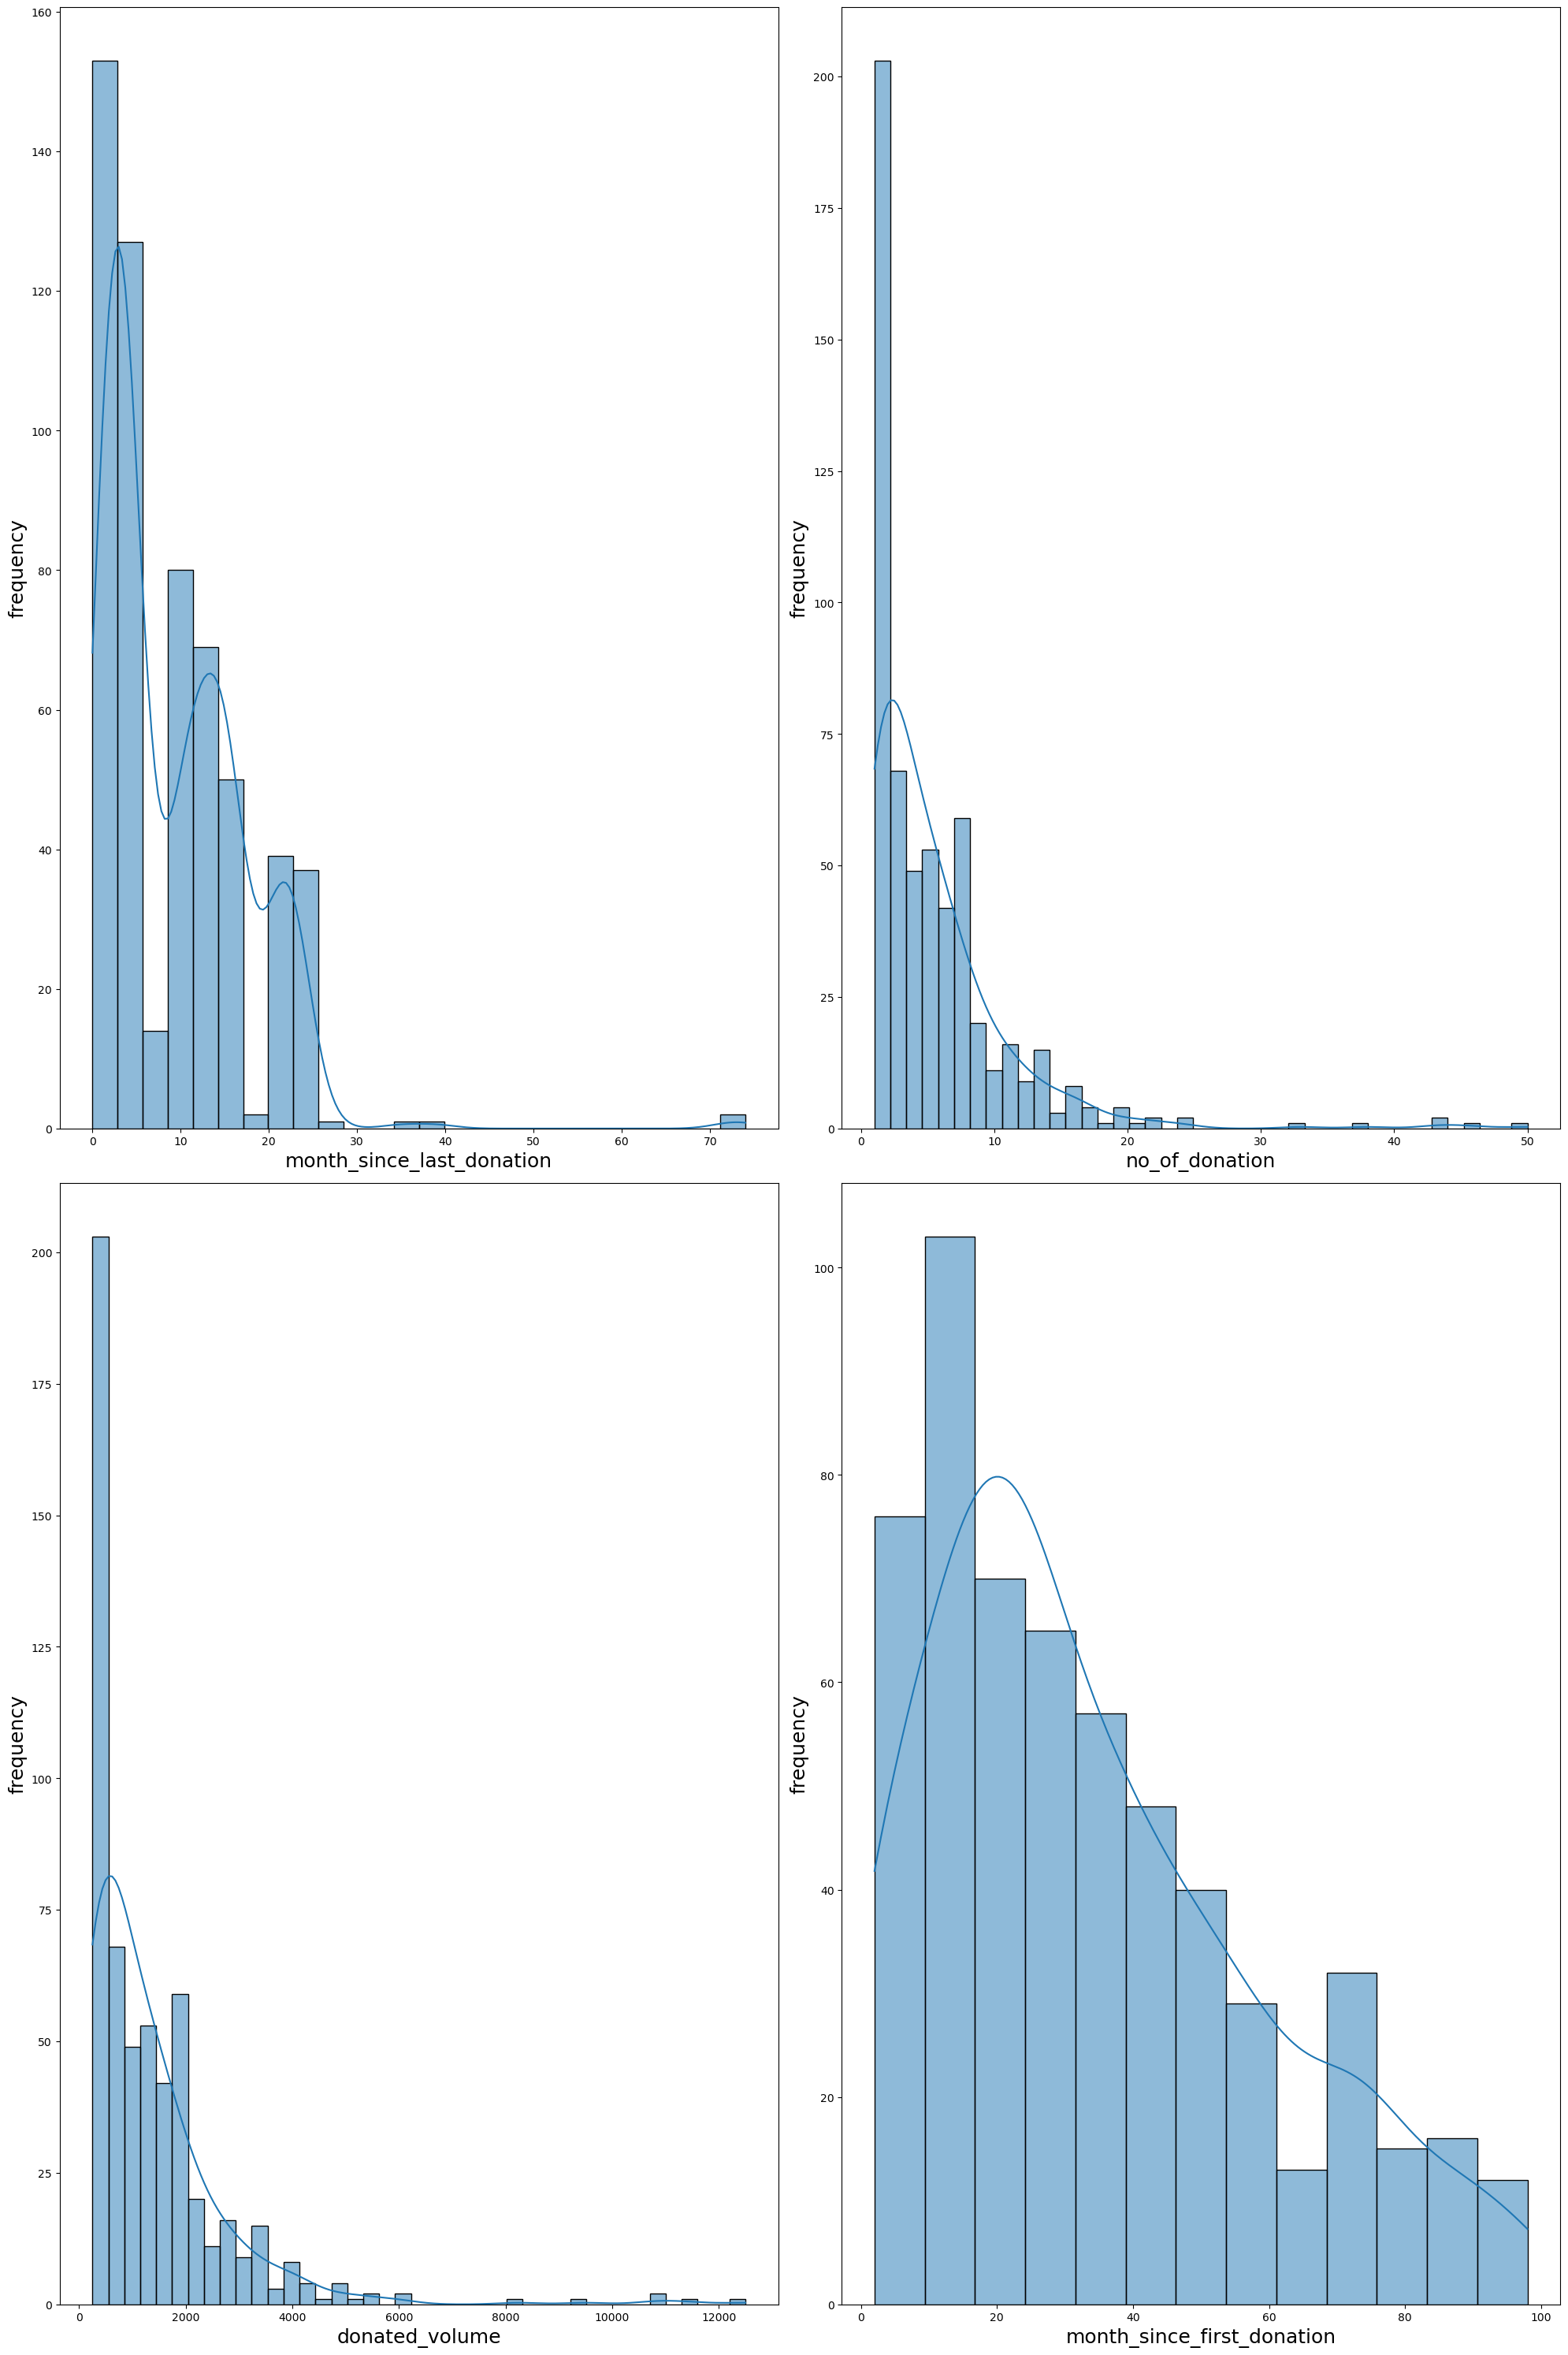

In [11]:
# HIST PLOT
plt.figure(figsize=(20,30),facecolor = 'white')   
plotnumber = 1
for i in data:
    if i != 'Unnamed: 0' and i != 'target':
        ax = plt.subplot(2,2,plotnumber)
        sns.histplot(x=i,data=data,kde=True)
        plt.xlabel(i,fontsize=18)
        plt.ylabel('frequency',fontsize = 18)
        plotnumber += 1
plt.tight_layout()
# people who had donated blood after 2,4,14 months since last donationhas been a major contributer of blood donation which is 54.7%
# 8 people has donated 16 times which is 4000ml of blood
# 20.5%(118) of people has donated only once
# 16 months after first donation 7.3%(42) of people has donated the blood
# 6.8% of the people has donated the blood after 4 months since 1st donation


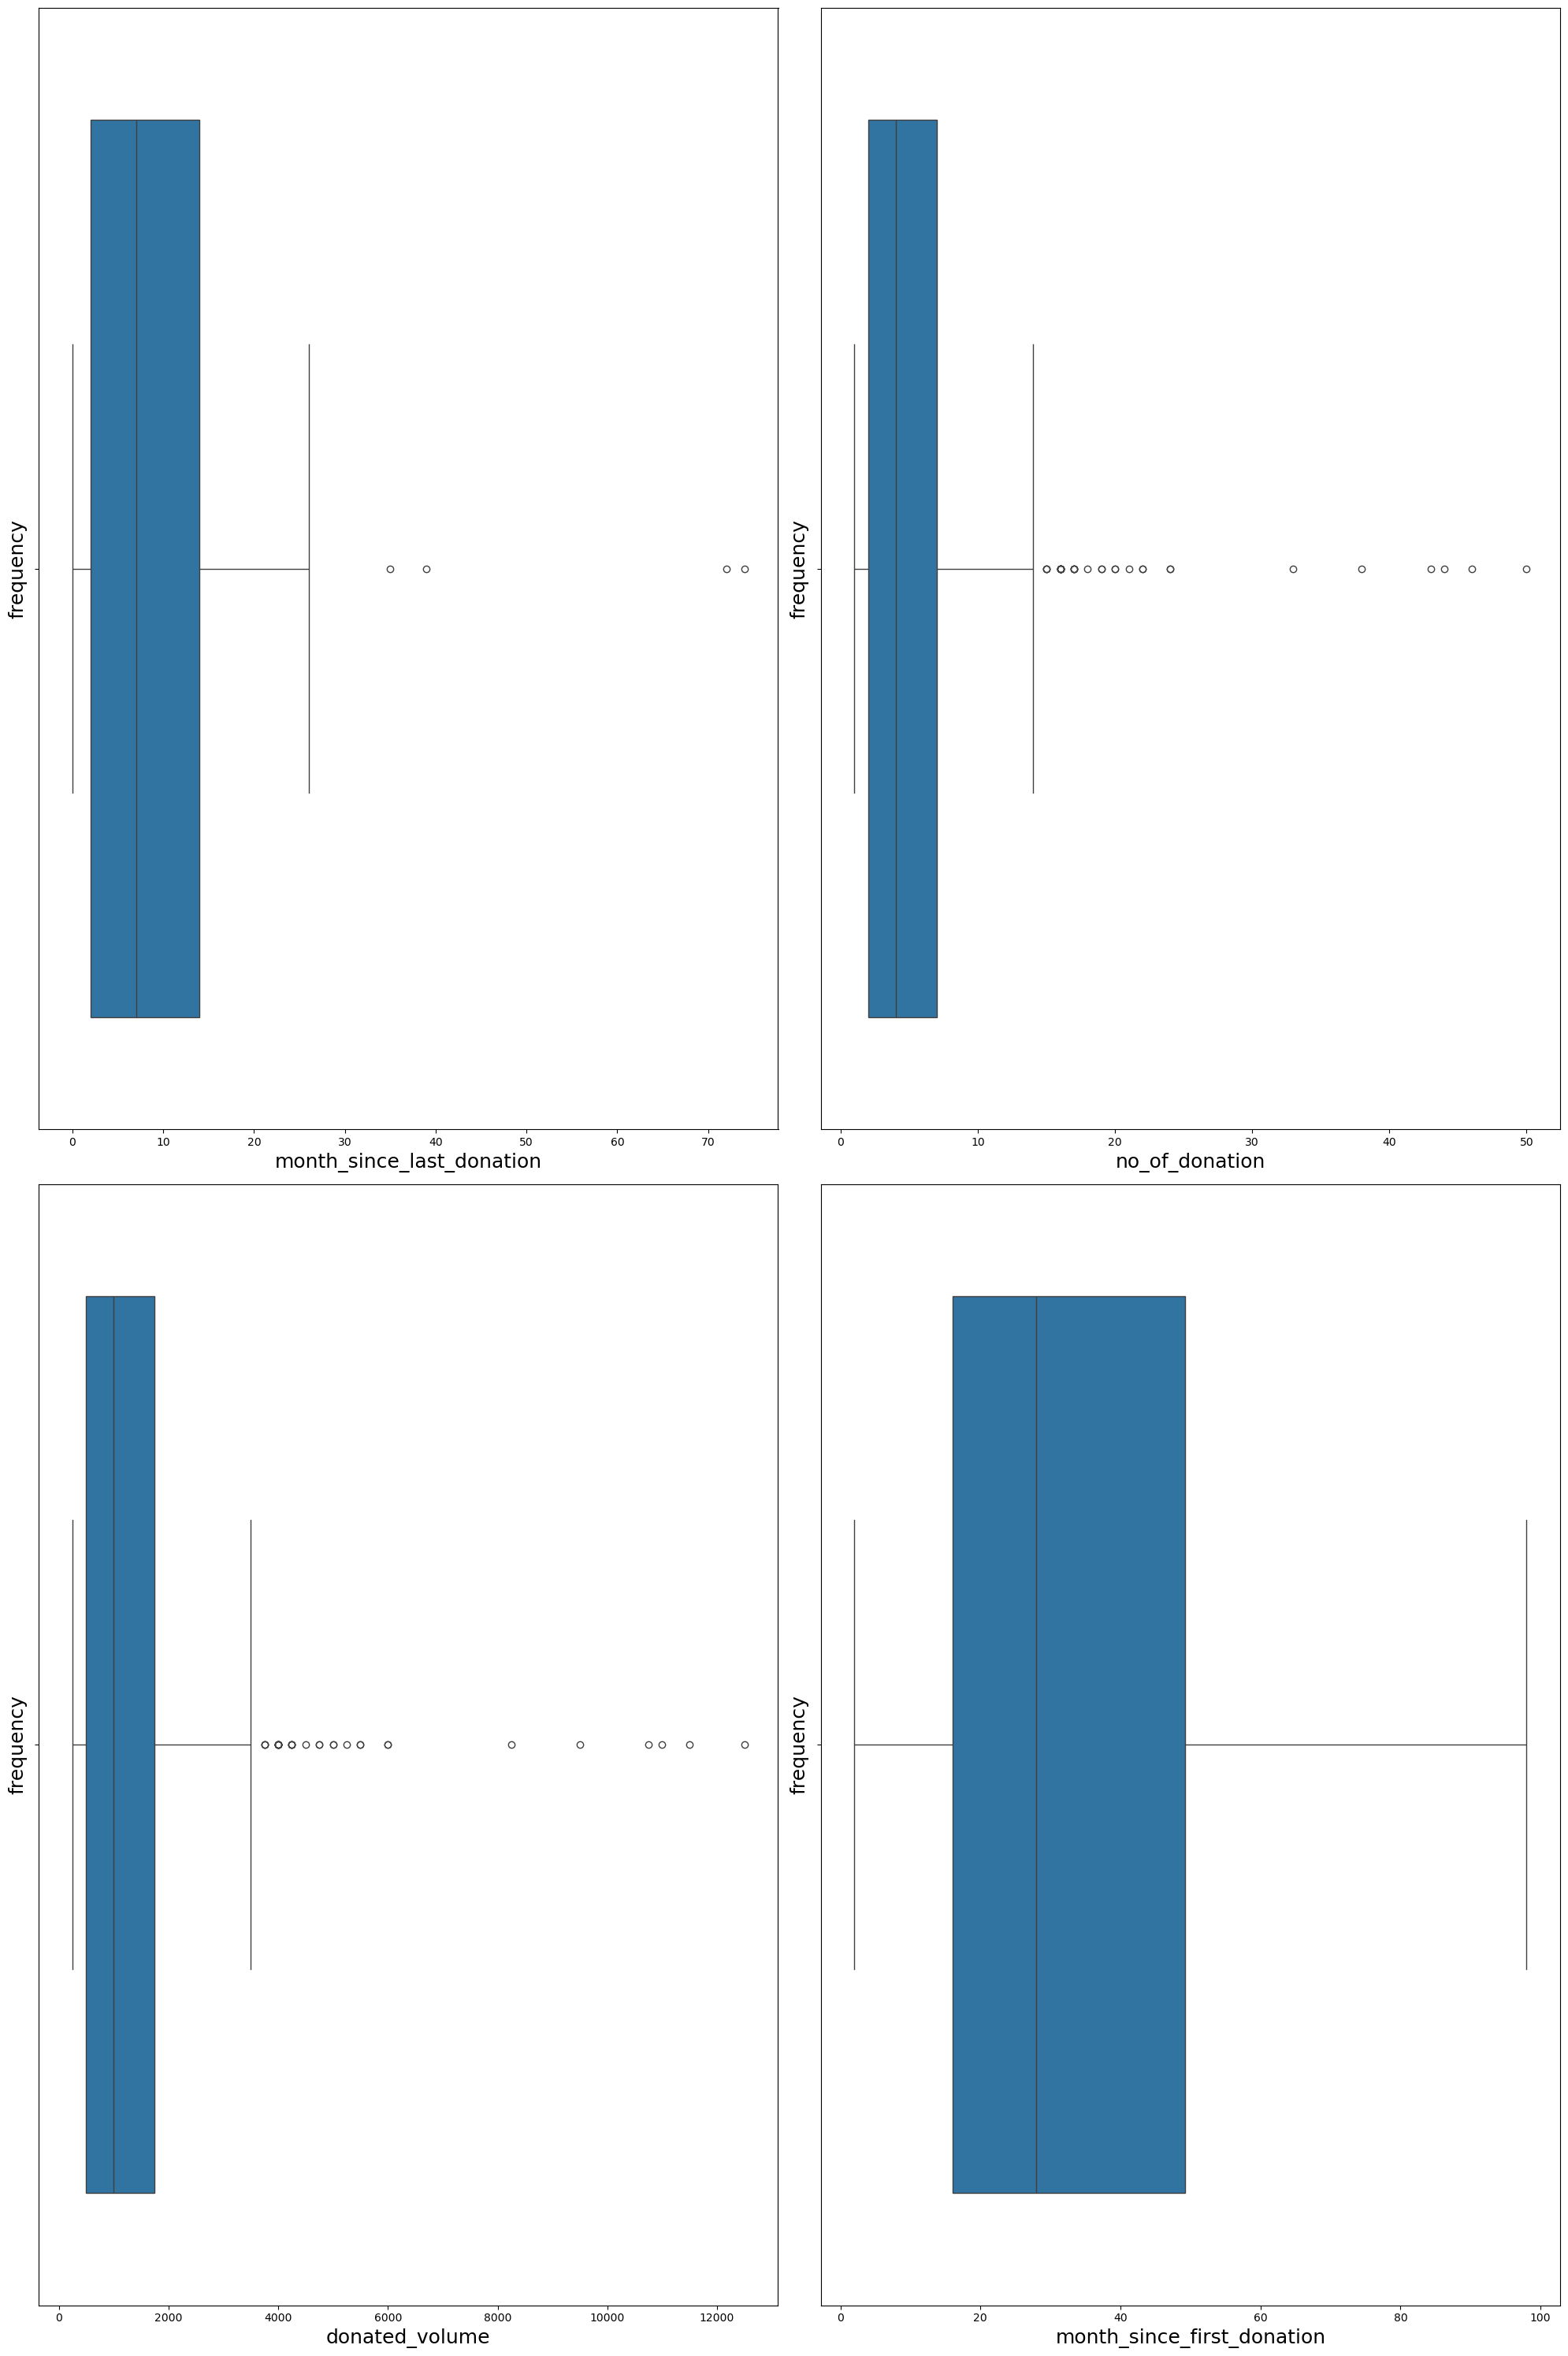

In [12]:
# BOX PLOT
plt.figure(figsize=(20,30),facecolor = 'white')   
plotnumber = 1
for i in data:
    if i != 'Unnamed: 0' and i != 'target':
        ax = plt.subplot(2,2,plotnumber)
        sns.boxplot(x=i,data=data)
        plt.xlabel(i,fontsize=18)
        plt.ylabel('frequency',fontsize = 18)
        plotnumber += 1
plt.tight_layout()
# 2 outliers at month_since_last_donation where their months after 1st donation was 74 and 39 and they have not donated blood since 
# remaining outliers have donated once after first donation but didnt donate during 2007

# OUTLIERS

In [13]:
# month_since_last_donation
data.loc[data.month_since_last_donation>30 ]

,Unnamed: 0,month_since_last_donation,no_of_donation,donated_volume,month_since_first_donation,target
384,673,35,3,750,64,0
385,350,74,1,250,74,0
574,541,39,1,250,39,0
575,74,72,1,250,72,0


In [14]:
# generating median value
data.month_since_last_donation.median()

7.0

In [15]:
# changing the month_since_last_donation with median value 
data.loc[data.month_since_last_donation>30,'month_since_last_donation'] = data.month_since_last_donation.median()
# the changed values dosent have an impact on output column so the data will not be baised

In [16]:
# checking whether the data has been changed
data.loc[[574,575,384,385] ]

,Unnamed: 0,month_since_last_donation,no_of_donation,donated_volume,month_since_first_donation,target
574,541,7,1,250,39,0
575,74,7,1,250,72,0
384,673,7,3,750,64,0
385,350,7,1,250,74,0


In [17]:
# no_of_donation and donated_volume
data.loc[(data.no_of_donation>40) & (data.donated_volume>8000)]
# changing the outliers is not necessary because  50 donation has been done within 2 moths since last donation and months since first donation was 98.
# 1 donation = 250ml(250c.c) of blood 50 donation multiplied into 250ml of blood = 12,500ml of blood
# if we manage the outliers the data will become biased

,Unnamed: 0,month_since_last_donation,no_of_donation,donated_volume,month_since_first_donation,target
0,619,2,50,12500,98,1
8,736,5,46,11500,98,1
386,39,2,43,10750,86,1
388,149,2,44,11000,98,0


# FEATURE SELECTION

<Axes: >

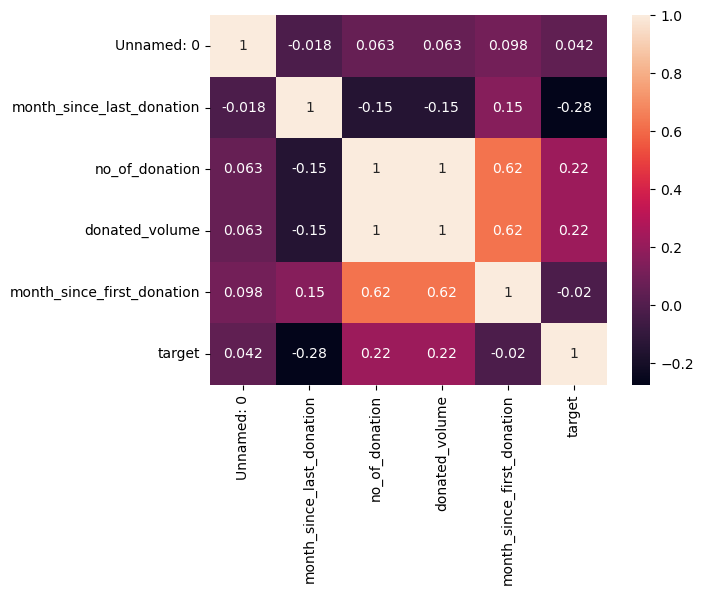

In [18]:
# checking the correlation
cor = data.corr()
sns.heatmap(cor,annot=True)

In [19]:
# droping unwanted variables if the correlation is less than 5%
data.drop('Unnamed: 0' , axis = 1,inplace = True )

<Axes: >

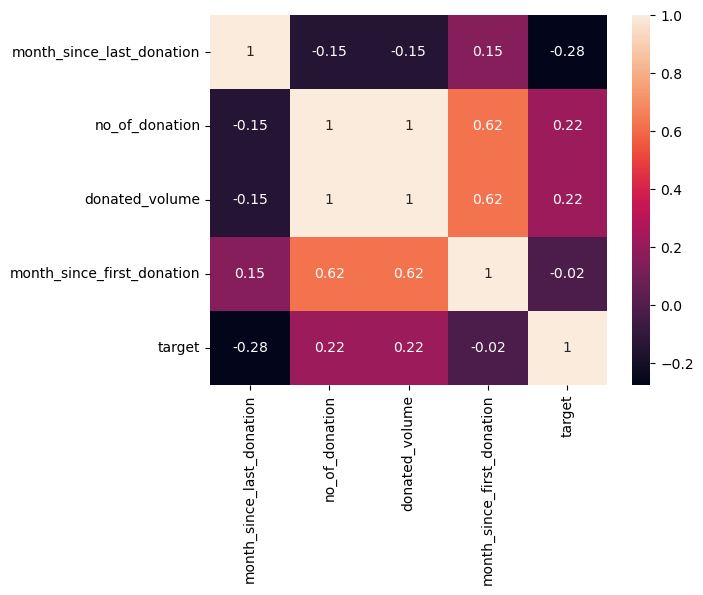

In [20]:
cor = data.corr()
sns.heatmap(cor,annot=True)

# SAVING DATA TO PREPROCESSED DATA

In [158]:
data.to_csv('Preprocessed_data.csv')
preprocessed_data=pd.read_csv('Preprocessed_data.csv')
preprocessed_data.drop('Unnamed: 0' , axis = 1,inplace = True )
preprocessed_data

,month_since_last_donation,no_of_donation,donated_volume,month_since_first_donation,target
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0
...,...,...,...,...,...
571,23,1,250,23,0
572,16,3,750,86,0
573,21,2,500,52,0
574,7,1,250,39,0


# SUPPORT VECTOR MACHINE

# TRAINING AND TESTING

In [159]:
# creating independent variable x1,y1
x1 = preprocessed_data.loc[:,:'month_since_first_donation']
y1 = preprocessed_data.target

In [160]:
# splitting the data  for testing and training
from sklearn.model_selection import train_test_split
x1_train,x1_test,y1_train,y1_test=train_test_split(x1, y1,random_state=3)

In [161]:
preprocessed_data.target.value_counts()
# the output column count has morely baised and the model can make false prediction by these outputs 

target
0    438
1    138
Name: count, dtype: int64

In [162]:
# using smote to balance data of the target column
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=17)

In [163]:
#fitting the data to smote
x1_smote, y1_smote = smote.fit_resample(x1_train,y1_train)

In [164]:
# visualization of smote data balancing
from collections import Counter
print("Actual Classes",Counter(y1_train))
print("SMOTE Classes",Counter(y1_smote))

Actual Classes Counter({0: 325, 1: 107})
SMOTE Classes Counter({1: 325, 0: 325})


# MODEL CREATION

In [165]:
# Support Vector Classifier Model

from sklearn.svm import SVC
svclassifier = SVC() 
svclassifier.fit(x1_smote, y1_smote)

SVC()

In [166]:
# Predict output for X_test
y1_predict=svclassifier.predict(x1_test)
y1_predict=pd.DataFrame(y1_predict)
y1_predict

,0
0,1
1,0
2,0
3,0
4,0
...,...
139,0
140,0
141,1
142,0


In [167]:
# CLASSIFICATION REPORT
from sklearn.metrics import accuracy_score,recall_score,precision_score,classification_report,f1_score
print(classification_report(y1_test,y1_predict))

              precision    recall  f1-score   support

           0       0.88      0.61      0.72       113
           1       0.33      0.71      0.45        31

    accuracy                           0.63       144
   macro avg       0.61      0.66      0.59       144
weighted avg       0.77      0.63      0.66       144



In [168]:
# CONFUSION MATRIX
from sklearn.metrics import confusion_matrix
cm1=confusion_matrix(y1_test,y1_predict)
conMatr = pd.DataFrame(cm1, columns=['Predicted as Non Donar', 'Predicted as Donar'])
conMatr.rename({0: 'Actual Non Donar', 1: 'Actual Donar'})
# model has predicted more false positives false negatives

,Predicted as Non Donar,Predicted as Donar
Actual Non Donar,69,44
Actual Donar,9,22


# HYPERPARAMETER TESTING

In [169]:
from sklearn.model_selection import GridSearchCV

# defining parameter range
param_grid = {'C': [1, 5,10,20,50,60,70],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
             'random_state':(list(range(1, 42)))}
model=SVC()
grid = GridSearchCV(model, param_grid, refit = True, verbose = 2,scoring='f1',cv=5)

# fitting the model for grid search
grid.fit(x1_smote,y1_smote)

Fitting 5 folds for each of 1435 candidates, totalling 7175 fits
[CV] END .......................C=1, gamma=1, random_state=1; total time=   0.1s
[CV] END .......................C=1, gamma=1, random_state=1; total time=   0.0s
[CV] END .......................C=1, gamma=1, random_state=1; total time=   0.0s
[CV] END .......................C=1, gamma=1, random_state=1; total time=   0.0s
[CV] END .......................C=1, gamma=1, random_state=1; total time=   0.0s
[CV] END .......................C=1, gamma=1, random_state=2; total time=   0.0s
[CV] END .......................C=1, gamma=1, random_state=2; total time=   0.0s
[CV] END .......................C=1, gamma=1, random_state=2; total time=   0.0s
[CV] END .......................C=1, gamma=1, random_state=2; total time=   0.0s
[CV] END .......................C=1, gamma=1, random_state=2; total time=   0.0s
[CV] END .......................C=1, gamma=1, random_state=3; total time=   0.0s
[CV] END .......................C=1, gamma=1

[CV] END ......................C=1, gamma=1, random_state=21; total time=   0.0s
[CV] END ......................C=1, gamma=1, random_state=21; total time=   0.0s
[CV] END ......................C=1, gamma=1, random_state=21; total time=   0.0s
[CV] END ......................C=1, gamma=1, random_state=22; total time=   0.0s
[CV] END ......................C=1, gamma=1, random_state=22; total time=   0.0s
[CV] END ......................C=1, gamma=1, random_state=22; total time=   0.0s
[CV] END ......................C=1, gamma=1, random_state=22; total time=   0.0s
[CV] END ......................C=1, gamma=1, random_state=22; total time=   0.0s
[CV] END ......................C=1, gamma=1, random_state=23; total time=   0.0s
[CV] END ......................C=1, gamma=1, random_state=23; total time=   0.0s
[CV] END ......................C=1, gamma=1, random_state=23; total time=   0.0s
[CV] END ......................C=1, gamma=1, random_state=23; total time=   0.0s
[CV] END ...................

[CV] END ......................C=1, gamma=1, random_state=41; total time=   0.0s
[CV] END .....................C=1, gamma=0.1, random_state=1; total time=   0.0s
[CV] END .....................C=1, gamma=0.1, random_state=1; total time=   0.0s
[CV] END .....................C=1, gamma=0.1, random_state=1; total time=   0.0s
[CV] END .....................C=1, gamma=0.1, random_state=1; total time=   0.0s
[CV] END .....................C=1, gamma=0.1, random_state=1; total time=   0.0s
[CV] END .....................C=1, gamma=0.1, random_state=2; total time=   0.0s
[CV] END .....................C=1, gamma=0.1, random_state=2; total time=   0.0s
[CV] END .....................C=1, gamma=0.1, random_state=2; total time=   0.0s
[CV] END .....................C=1, gamma=0.1, random_state=2; total time=   0.0s
[CV] END .....................C=1, gamma=0.1, random_state=2; total time=   0.0s
[CV] END .....................C=1, gamma=0.1, random_state=3; total time=   0.0s
[CV] END ...................

[CV] END ....................C=1, gamma=0.1, random_state=21; total time=   0.0s
[CV] END ....................C=1, gamma=0.1, random_state=21; total time=   0.0s
[CV] END ....................C=1, gamma=0.1, random_state=21; total time=   0.0s
[CV] END ....................C=1, gamma=0.1, random_state=21; total time=   0.0s
[CV] END ....................C=1, gamma=0.1, random_state=22; total time=   0.0s
[CV] END ....................C=1, gamma=0.1, random_state=22; total time=   0.0s
[CV] END ....................C=1, gamma=0.1, random_state=22; total time=   0.0s
[CV] END ....................C=1, gamma=0.1, random_state=22; total time=   0.0s
[CV] END ....................C=1, gamma=0.1, random_state=22; total time=   0.0s
[CV] END ....................C=1, gamma=0.1, random_state=23; total time=   0.0s
[CV] END ....................C=1, gamma=0.1, random_state=23; total time=   0.0s
[CV] END ....................C=1, gamma=0.1, random_state=23; total time=   0.0s
[CV] END ...................

[CV] END ....................C=1, gamma=0.1, random_state=41; total time=   0.0s
[CV] END ....................C=1, gamma=0.1, random_state=41; total time=   0.0s
[CV] END ....................C=1, gamma=0.01, random_state=1; total time=   0.0s
[CV] END ....................C=1, gamma=0.01, random_state=1; total time=   0.0s
[CV] END ....................C=1, gamma=0.01, random_state=1; total time=   0.0s
[CV] END ....................C=1, gamma=0.01, random_state=1; total time=   0.0s
[CV] END ....................C=1, gamma=0.01, random_state=1; total time=   0.0s
[CV] END ....................C=1, gamma=0.01, random_state=2; total time=   0.0s
[CV] END ....................C=1, gamma=0.01, random_state=2; total time=   0.0s
[CV] END ....................C=1, gamma=0.01, random_state=2; total time=   0.0s
[CV] END ....................C=1, gamma=0.01, random_state=2; total time=   0.0s
[CV] END ....................C=1, gamma=0.01, random_state=2; total time=   0.0s
[CV] END ...................

[CV] END ...................C=1, gamma=0.01, random_state=21; total time=   0.0s
[CV] END ...................C=1, gamma=0.01, random_state=21; total time=   0.0s
[CV] END ...................C=1, gamma=0.01, random_state=21; total time=   0.0s
[CV] END ...................C=1, gamma=0.01, random_state=21; total time=   0.0s
[CV] END ...................C=1, gamma=0.01, random_state=21; total time=   0.0s
[CV] END ...................C=1, gamma=0.01, random_state=22; total time=   0.0s
[CV] END ...................C=1, gamma=0.01, random_state=22; total time=   0.0s
[CV] END ...................C=1, gamma=0.01, random_state=22; total time=   0.0s
[CV] END ...................C=1, gamma=0.01, random_state=22; total time=   0.0s
[CV] END ...................C=1, gamma=0.01, random_state=22; total time=   0.0s
[CV] END ...................C=1, gamma=0.01, random_state=23; total time=   0.0s
[CV] END ...................C=1, gamma=0.01, random_state=23; total time=   0.0s
[CV] END ...................

[CV] END ...................C=1, gamma=0.01, random_state=41; total time=   0.0s
[CV] END ...................C=1, gamma=0.01, random_state=41; total time=   0.0s
[CV] END ...................C=1, gamma=0.01, random_state=41; total time=   0.0s
[CV] END ...................C=1, gamma=0.001, random_state=1; total time=   0.0s
[CV] END ...................C=1, gamma=0.001, random_state=1; total time=   0.0s
[CV] END ...................C=1, gamma=0.001, random_state=1; total time=   0.0s
[CV] END ...................C=1, gamma=0.001, random_state=1; total time=   0.0s
[CV] END ...................C=1, gamma=0.001, random_state=1; total time=   0.0s
[CV] END ...................C=1, gamma=0.001, random_state=2; total time=   0.0s
[CV] END ...................C=1, gamma=0.001, random_state=2; total time=   0.0s
[CV] END ...................C=1, gamma=0.001, random_state=2; total time=   0.0s
[CV] END ...................C=1, gamma=0.001, random_state=2; total time=   0.0s
[CV] END ...................

[CV] END ..................C=1, gamma=0.001, random_state=20; total time=   0.0s
[CV] END ..................C=1, gamma=0.001, random_state=21; total time=   0.0s
[CV] END ..................C=1, gamma=0.001, random_state=21; total time=   0.0s
[CV] END ..................C=1, gamma=0.001, random_state=21; total time=   0.0s
[CV] END ..................C=1, gamma=0.001, random_state=21; total time=   0.0s
[CV] END ..................C=1, gamma=0.001, random_state=21; total time=   0.0s
[CV] END ..................C=1, gamma=0.001, random_state=22; total time=   0.0s
[CV] END ..................C=1, gamma=0.001, random_state=22; total time=   0.0s
[CV] END ..................C=1, gamma=0.001, random_state=22; total time=   0.0s
[CV] END ..................C=1, gamma=0.001, random_state=22; total time=   0.0s
[CV] END ..................C=1, gamma=0.001, random_state=22; total time=   0.0s
[CV] END ..................C=1, gamma=0.001, random_state=23; total time=   0.0s
[CV] END ..................C

[CV] END ..................C=1, gamma=0.001, random_state=41; total time=   0.0s
[CV] END ..................C=1, gamma=0.001, random_state=41; total time=   0.0s
[CV] END ..................C=1, gamma=0.0001, random_state=1; total time=   0.0s
[CV] END ..................C=1, gamma=0.0001, random_state=1; total time=   0.0s
[CV] END ..................C=1, gamma=0.0001, random_state=1; total time=   0.0s
[CV] END ..................C=1, gamma=0.0001, random_state=1; total time=   0.0s
[CV] END ..................C=1, gamma=0.0001, random_state=1; total time=   0.0s
[CV] END ..................C=1, gamma=0.0001, random_state=2; total time=   0.0s
[CV] END ..................C=1, gamma=0.0001, random_state=2; total time=   0.0s
[CV] END ..................C=1, gamma=0.0001, random_state=2; total time=   0.0s
[CV] END ..................C=1, gamma=0.0001, random_state=2; total time=   0.0s
[CV] END ..................C=1, gamma=0.0001, random_state=2; total time=   0.0s
[CV] END ..................C

[CV] END .................C=1, gamma=0.0001, random_state=21; total time=   0.0s
[CV] END .................C=1, gamma=0.0001, random_state=21; total time=   0.0s
[CV] END .................C=1, gamma=0.0001, random_state=22; total time=   0.0s
[CV] END .................C=1, gamma=0.0001, random_state=22; total time=   0.0s
[CV] END .................C=1, gamma=0.0001, random_state=22; total time=   0.0s
[CV] END .................C=1, gamma=0.0001, random_state=22; total time=   0.0s
[CV] END .................C=1, gamma=0.0001, random_state=22; total time=   0.0s
[CV] END .................C=1, gamma=0.0001, random_state=23; total time=   0.0s
[CV] END .................C=1, gamma=0.0001, random_state=23; total time=   0.0s
[CV] END .................C=1, gamma=0.0001, random_state=23; total time=   0.0s
[CV] END .................C=1, gamma=0.0001, random_state=23; total time=   0.0s
[CV] END .................C=1, gamma=0.0001, random_state=23; total time=   0.0s
[CV] END .................C=

[CV] END .......................C=5, gamma=1, random_state=1; total time=   0.0s
[CV] END .......................C=5, gamma=1, random_state=1; total time=   0.0s
[CV] END .......................C=5, gamma=1, random_state=1; total time=   0.0s
[CV] END .......................C=5, gamma=1, random_state=1; total time=   0.0s
[CV] END .......................C=5, gamma=1, random_state=2; total time=   0.0s
[CV] END .......................C=5, gamma=1, random_state=2; total time=   0.0s
[CV] END .......................C=5, gamma=1, random_state=2; total time=   0.0s
[CV] END .......................C=5, gamma=1, random_state=2; total time=   0.0s
[CV] END .......................C=5, gamma=1, random_state=2; total time=   0.0s
[CV] END .......................C=5, gamma=1, random_state=3; total time=   0.0s
[CV] END .......................C=5, gamma=1, random_state=3; total time=   0.0s
[CV] END .......................C=5, gamma=1, random_state=3; total time=   0.0s
[CV] END ...................

[CV] END ......................C=5, gamma=1, random_state=21; total time=   0.0s
[CV] END ......................C=5, gamma=1, random_state=21; total time=   0.0s
[CV] END ......................C=5, gamma=1, random_state=22; total time=   0.0s
[CV] END ......................C=5, gamma=1, random_state=22; total time=   0.0s
[CV] END ......................C=5, gamma=1, random_state=22; total time=   0.0s
[CV] END ......................C=5, gamma=1, random_state=22; total time=   0.0s
[CV] END ......................C=5, gamma=1, random_state=22; total time=   0.0s
[CV] END ......................C=5, gamma=1, random_state=23; total time=   0.0s
[CV] END ......................C=5, gamma=1, random_state=23; total time=   0.0s
[CV] END ......................C=5, gamma=1, random_state=23; total time=   0.0s
[CV] END ......................C=5, gamma=1, random_state=23; total time=   0.0s
[CV] END ......................C=5, gamma=1, random_state=23; total time=   0.0s
[CV] END ...................

[CV] END .....................C=5, gamma=0.1, random_state=1; total time=   0.0s
[CV] END .....................C=5, gamma=0.1, random_state=1; total time=   0.0s
[CV] END .....................C=5, gamma=0.1, random_state=1; total time=   0.0s
[CV] END .....................C=5, gamma=0.1, random_state=1; total time=   0.0s
[CV] END .....................C=5, gamma=0.1, random_state=1; total time=   0.0s
[CV] END .....................C=5, gamma=0.1, random_state=2; total time=   0.0s
[CV] END .....................C=5, gamma=0.1, random_state=2; total time=   0.0s
[CV] END .....................C=5, gamma=0.1, random_state=2; total time=   0.0s
[CV] END .....................C=5, gamma=0.1, random_state=2; total time=   0.0s
[CV] END .....................C=5, gamma=0.1, random_state=2; total time=   0.0s
[CV] END .....................C=5, gamma=0.1, random_state=3; total time=   0.0s
[CV] END .....................C=5, gamma=0.1, random_state=3; total time=   0.0s
[CV] END ...................

[CV] END ....................C=5, gamma=0.1, random_state=21; total time=   0.0s
[CV] END ....................C=5, gamma=0.1, random_state=22; total time=   0.0s
[CV] END ....................C=5, gamma=0.1, random_state=22; total time=   0.0s
[CV] END ....................C=5, gamma=0.1, random_state=22; total time=   0.0s
[CV] END ....................C=5, gamma=0.1, random_state=22; total time=   0.0s
[CV] END ....................C=5, gamma=0.1, random_state=22; total time=   0.0s
[CV] END ....................C=5, gamma=0.1, random_state=23; total time=   0.0s
[CV] END ....................C=5, gamma=0.1, random_state=23; total time=   0.0s
[CV] END ....................C=5, gamma=0.1, random_state=23; total time=   0.0s
[CV] END ....................C=5, gamma=0.1, random_state=23; total time=   0.0s
[CV] END ....................C=5, gamma=0.1, random_state=23; total time=   0.0s
[CV] END ....................C=5, gamma=0.1, random_state=24; total time=   0.0s
[CV] END ...................

[CV] END ....................C=5, gamma=0.01, random_state=1; total time=   0.0s
[CV] END ....................C=5, gamma=0.01, random_state=1; total time=   0.0s
[CV] END ....................C=5, gamma=0.01, random_state=1; total time=   0.0s
[CV] END ....................C=5, gamma=0.01, random_state=1; total time=   0.0s
[CV] END ....................C=5, gamma=0.01, random_state=2; total time=   0.0s
[CV] END ....................C=5, gamma=0.01, random_state=2; total time=   0.0s
[CV] END ....................C=5, gamma=0.01, random_state=2; total time=   0.0s
[CV] END ....................C=5, gamma=0.01, random_state=2; total time=   0.0s
[CV] END ....................C=5, gamma=0.01, random_state=2; total time=   0.0s
[CV] END ....................C=5, gamma=0.01, random_state=3; total time=   0.0s
[CV] END ....................C=5, gamma=0.01, random_state=3; total time=   0.0s
[CV] END ....................C=5, gamma=0.01, random_state=3; total time=   0.0s
[CV] END ...................

[CV] END ...................C=5, gamma=0.01, random_state=22; total time=   0.0s
[CV] END ...................C=5, gamma=0.01, random_state=22; total time=   0.0s
[CV] END ...................C=5, gamma=0.01, random_state=22; total time=   0.0s
[CV] END ...................C=5, gamma=0.01, random_state=22; total time=   0.0s
[CV] END ...................C=5, gamma=0.01, random_state=22; total time=   0.0s
[CV] END ...................C=5, gamma=0.01, random_state=23; total time=   0.0s
[CV] END ...................C=5, gamma=0.01, random_state=23; total time=   0.0s
[CV] END ...................C=5, gamma=0.01, random_state=23; total time=   0.0s
[CV] END ...................C=5, gamma=0.01, random_state=23; total time=   0.0s
[CV] END ...................C=5, gamma=0.01, random_state=23; total time=   0.0s
[CV] END ...................C=5, gamma=0.01, random_state=24; total time=   0.0s
[CV] END ...................C=5, gamma=0.01, random_state=24; total time=   0.0s
[CV] END ...................

[CV] END ...................C=5, gamma=0.001, random_state=1; total time=   0.0s
[CV] END ...................C=5, gamma=0.001, random_state=1; total time=   0.0s
[CV] END ...................C=5, gamma=0.001, random_state=2; total time=   0.0s
[CV] END ...................C=5, gamma=0.001, random_state=2; total time=   0.0s
[CV] END ...................C=5, gamma=0.001, random_state=2; total time=   0.0s
[CV] END ...................C=5, gamma=0.001, random_state=2; total time=   0.0s
[CV] END ...................C=5, gamma=0.001, random_state=2; total time=   0.0s
[CV] END ...................C=5, gamma=0.001, random_state=3; total time=   0.0s
[CV] END ...................C=5, gamma=0.001, random_state=3; total time=   0.0s
[CV] END ...................C=5, gamma=0.001, random_state=3; total time=   0.0s
[CV] END ...................C=5, gamma=0.001, random_state=3; total time=   0.0s
[CV] END ...................C=5, gamma=0.001, random_state=3; total time=   0.0s
[CV] END ...................

[CV] END ..................C=5, gamma=0.001, random_state=22; total time=   0.0s
[CV] END ..................C=5, gamma=0.001, random_state=22; total time=   0.0s
[CV] END ..................C=5, gamma=0.001, random_state=22; total time=   0.0s
[CV] END ..................C=5, gamma=0.001, random_state=22; total time=   0.0s
[CV] END ..................C=5, gamma=0.001, random_state=23; total time=   0.0s
[CV] END ..................C=5, gamma=0.001, random_state=23; total time=   0.0s
[CV] END ..................C=5, gamma=0.001, random_state=23; total time=   0.0s
[CV] END ..................C=5, gamma=0.001, random_state=23; total time=   0.0s
[CV] END ..................C=5, gamma=0.001, random_state=23; total time=   0.0s
[CV] END ..................C=5, gamma=0.001, random_state=24; total time=   0.0s
[CV] END ..................C=5, gamma=0.001, random_state=24; total time=   0.0s
[CV] END ..................C=5, gamma=0.001, random_state=24; total time=   0.0s
[CV] END ..................C

[CV] END ..................C=5, gamma=0.0001, random_state=2; total time=   0.0s
[CV] END ..................C=5, gamma=0.0001, random_state=2; total time=   0.0s
[CV] END ..................C=5, gamma=0.0001, random_state=2; total time=   0.0s
[CV] END ..................C=5, gamma=0.0001, random_state=2; total time=   0.0s
[CV] END ..................C=5, gamma=0.0001, random_state=2; total time=   0.0s
[CV] END ..................C=5, gamma=0.0001, random_state=3; total time=   0.0s
[CV] END ..................C=5, gamma=0.0001, random_state=3; total time=   0.0s
[CV] END ..................C=5, gamma=0.0001, random_state=3; total time=   0.0s
[CV] END ..................C=5, gamma=0.0001, random_state=3; total time=   0.0s
[CV] END ..................C=5, gamma=0.0001, random_state=3; total time=   0.0s
[CV] END ..................C=5, gamma=0.0001, random_state=4; total time=   0.0s
[CV] END ..................C=5, gamma=0.0001, random_state=4; total time=   0.0s
[CV] END ..................C

[CV] END .................C=5, gamma=0.0001, random_state=23; total time=   0.0s
[CV] END .................C=5, gamma=0.0001, random_state=23; total time=   0.0s
[CV] END .................C=5, gamma=0.0001, random_state=23; total time=   0.0s
[CV] END .................C=5, gamma=0.0001, random_state=23; total time=   0.0s
[CV] END .................C=5, gamma=0.0001, random_state=23; total time=   0.0s
[CV] END .................C=5, gamma=0.0001, random_state=24; total time=   0.0s
[CV] END .................C=5, gamma=0.0001, random_state=24; total time=   0.0s
[CV] END .................C=5, gamma=0.0001, random_state=24; total time=   0.0s
[CV] END .................C=5, gamma=0.0001, random_state=24; total time=   0.0s
[CV] END .................C=5, gamma=0.0001, random_state=24; total time=   0.0s
[CV] END .................C=5, gamma=0.0001, random_state=25; total time=   0.0s
[CV] END .................C=5, gamma=0.0001, random_state=25; total time=   0.0s
[CV] END .................C=

[CV] END ......................C=10, gamma=1, random_state=2; total time=   0.0s
[CV] END ......................C=10, gamma=1, random_state=2; total time=   0.0s
[CV] END ......................C=10, gamma=1, random_state=2; total time=   0.0s
[CV] END ......................C=10, gamma=1, random_state=3; total time=   0.0s
[CV] END ......................C=10, gamma=1, random_state=3; total time=   0.0s
[CV] END ......................C=10, gamma=1, random_state=3; total time=   0.0s
[CV] END ......................C=10, gamma=1, random_state=3; total time=   0.0s
[CV] END ......................C=10, gamma=1, random_state=3; total time=   0.0s
[CV] END ......................C=10, gamma=1, random_state=4; total time=   0.0s
[CV] END ......................C=10, gamma=1, random_state=4; total time=   0.0s
[CV] END ......................C=10, gamma=1, random_state=4; total time=   0.0s
[CV] END ......................C=10, gamma=1, random_state=4; total time=   0.0s
[CV] END ...................

[CV] END .....................C=10, gamma=1, random_state=22; total time=   0.0s
[CV] END .....................C=10, gamma=1, random_state=23; total time=   0.0s
[CV] END .....................C=10, gamma=1, random_state=23; total time=   0.0s
[CV] END .....................C=10, gamma=1, random_state=23; total time=   0.0s
[CV] END .....................C=10, gamma=1, random_state=23; total time=   0.0s
[CV] END .....................C=10, gamma=1, random_state=23; total time=   0.0s
[CV] END .....................C=10, gamma=1, random_state=24; total time=   0.0s
[CV] END .....................C=10, gamma=1, random_state=24; total time=   0.0s
[CV] END .....................C=10, gamma=1, random_state=24; total time=   0.0s
[CV] END .....................C=10, gamma=1, random_state=24; total time=   0.0s
[CV] END .....................C=10, gamma=1, random_state=24; total time=   0.0s
[CV] END .....................C=10, gamma=1, random_state=25; total time=   0.0s
[CV] END ...................

[CV] END ....................C=10, gamma=0.1, random_state=2; total time=   0.0s
[CV] END ....................C=10, gamma=0.1, random_state=2; total time=   0.0s
[CV] END ....................C=10, gamma=0.1, random_state=2; total time=   0.0s
[CV] END ....................C=10, gamma=0.1, random_state=2; total time=   0.0s
[CV] END ....................C=10, gamma=0.1, random_state=3; total time=   0.0s
[CV] END ....................C=10, gamma=0.1, random_state=3; total time=   0.0s
[CV] END ....................C=10, gamma=0.1, random_state=3; total time=   0.0s
[CV] END ....................C=10, gamma=0.1, random_state=3; total time=   0.0s
[CV] END ....................C=10, gamma=0.1, random_state=3; total time=   0.0s
[CV] END ....................C=10, gamma=0.1, random_state=4; total time=   0.0s
[CV] END ....................C=10, gamma=0.1, random_state=4; total time=   0.0s
[CV] END ....................C=10, gamma=0.1, random_state=4; total time=   0.0s
[CV] END ...................

[CV] END ...................C=10, gamma=0.1, random_state=22; total time=   0.0s
[CV] END ...................C=10, gamma=0.1, random_state=22; total time=   0.0s
[CV] END ...................C=10, gamma=0.1, random_state=23; total time=   0.0s
[CV] END ...................C=10, gamma=0.1, random_state=23; total time=   0.0s
[CV] END ...................C=10, gamma=0.1, random_state=23; total time=   0.0s
[CV] END ...................C=10, gamma=0.1, random_state=23; total time=   0.0s
[CV] END ...................C=10, gamma=0.1, random_state=23; total time=   0.0s
[CV] END ...................C=10, gamma=0.1, random_state=24; total time=   0.0s
[CV] END ...................C=10, gamma=0.1, random_state=24; total time=   0.0s
[CV] END ...................C=10, gamma=0.1, random_state=24; total time=   0.0s
[CV] END ...................C=10, gamma=0.1, random_state=24; total time=   0.0s
[CV] END ...................C=10, gamma=0.1, random_state=24; total time=   0.0s
[CV] END ...................

[CV] END ...................C=10, gamma=0.01, random_state=2; total time=   0.0s
[CV] END ...................C=10, gamma=0.01, random_state=2; total time=   0.0s
[CV] END ...................C=10, gamma=0.01, random_state=2; total time=   0.0s
[CV] END ...................C=10, gamma=0.01, random_state=2; total time=   0.0s
[CV] END ...................C=10, gamma=0.01, random_state=2; total time=   0.0s
[CV] END ...................C=10, gamma=0.01, random_state=3; total time=   0.0s
[CV] END ...................C=10, gamma=0.01, random_state=3; total time=   0.0s
[CV] END ...................C=10, gamma=0.01, random_state=3; total time=   0.0s
[CV] END ...................C=10, gamma=0.01, random_state=3; total time=   0.0s
[CV] END ...................C=10, gamma=0.01, random_state=3; total time=   0.0s
[CV] END ...................C=10, gamma=0.01, random_state=4; total time=   0.0s
[CV] END ...................C=10, gamma=0.01, random_state=4; total time=   0.0s
[CV] END ...................

[CV] END ..................C=10, gamma=0.01, random_state=22; total time=   0.0s
[CV] END ..................C=10, gamma=0.01, random_state=22; total time=   0.0s
[CV] END ..................C=10, gamma=0.01, random_state=22; total time=   0.0s
[CV] END ..................C=10, gamma=0.01, random_state=23; total time=   0.0s
[CV] END ..................C=10, gamma=0.01, random_state=23; total time=   0.0s
[CV] END ..................C=10, gamma=0.01, random_state=23; total time=   0.0s
[CV] END ..................C=10, gamma=0.01, random_state=23; total time=   0.0s
[CV] END ..................C=10, gamma=0.01, random_state=23; total time=   0.0s
[CV] END ..................C=10, gamma=0.01, random_state=24; total time=   0.0s
[CV] END ..................C=10, gamma=0.01, random_state=24; total time=   0.0s
[CV] END ..................C=10, gamma=0.01, random_state=24; total time=   0.0s
[CV] END ..................C=10, gamma=0.01, random_state=24; total time=   0.0s
[CV] END ..................C

[CV] END ..................C=10, gamma=0.001, random_state=2; total time=   0.0s
[CV] END ..................C=10, gamma=0.001, random_state=2; total time=   0.0s
[CV] END ..................C=10, gamma=0.001, random_state=2; total time=   0.0s
[CV] END ..................C=10, gamma=0.001, random_state=2; total time=   0.0s
[CV] END ..................C=10, gamma=0.001, random_state=3; total time=   0.0s
[CV] END ..................C=10, gamma=0.001, random_state=3; total time=   0.0s
[CV] END ..................C=10, gamma=0.001, random_state=3; total time=   0.0s
[CV] END ..................C=10, gamma=0.001, random_state=3; total time=   0.0s
[CV] END ..................C=10, gamma=0.001, random_state=3; total time=   0.0s
[CV] END ..................C=10, gamma=0.001, random_state=4; total time=   0.0s
[CV] END ..................C=10, gamma=0.001, random_state=4; total time=   0.0s
[CV] END ..................C=10, gamma=0.001, random_state=4; total time=   0.0s
[CV] END ..................C

[CV] END .................C=10, gamma=0.001, random_state=22; total time=   0.0s
[CV] END .................C=10, gamma=0.001, random_state=22; total time=   0.0s
[CV] END .................C=10, gamma=0.001, random_state=23; total time=   0.0s
[CV] END .................C=10, gamma=0.001, random_state=23; total time=   0.0s
[CV] END .................C=10, gamma=0.001, random_state=23; total time=   0.0s
[CV] END .................C=10, gamma=0.001, random_state=23; total time=   0.0s
[CV] END .................C=10, gamma=0.001, random_state=23; total time=   0.0s
[CV] END .................C=10, gamma=0.001, random_state=24; total time=   0.0s
[CV] END .................C=10, gamma=0.001, random_state=24; total time=   0.0s
[CV] END .................C=10, gamma=0.001, random_state=24; total time=   0.0s
[CV] END .................C=10, gamma=0.001, random_state=24; total time=   0.0s
[CV] END .................C=10, gamma=0.001, random_state=24; total time=   0.0s
[CV] END .................C=

[CV] END .................C=10, gamma=0.0001, random_state=2; total time=   0.0s
[CV] END .................C=10, gamma=0.0001, random_state=2; total time=   0.0s
[CV] END .................C=10, gamma=0.0001, random_state=2; total time=   0.0s
[CV] END .................C=10, gamma=0.0001, random_state=2; total time=   0.0s
[CV] END .................C=10, gamma=0.0001, random_state=3; total time=   0.0s
[CV] END .................C=10, gamma=0.0001, random_state=3; total time=   0.0s
[CV] END .................C=10, gamma=0.0001, random_state=3; total time=   0.0s
[CV] END .................C=10, gamma=0.0001, random_state=3; total time=   0.0s
[CV] END .................C=10, gamma=0.0001, random_state=3; total time=   0.0s
[CV] END .................C=10, gamma=0.0001, random_state=4; total time=   0.0s
[CV] END .................C=10, gamma=0.0001, random_state=4; total time=   0.0s
[CV] END .................C=10, gamma=0.0001, random_state=4; total time=   0.0s
[CV] END .................C=

[CV] END ................C=10, gamma=0.0001, random_state=23; total time=   0.0s
[CV] END ................C=10, gamma=0.0001, random_state=23; total time=   0.0s
[CV] END ................C=10, gamma=0.0001, random_state=23; total time=   0.0s
[CV] END ................C=10, gamma=0.0001, random_state=23; total time=   0.0s
[CV] END ................C=10, gamma=0.0001, random_state=24; total time=   0.0s
[CV] END ................C=10, gamma=0.0001, random_state=24; total time=   0.0s
[CV] END ................C=10, gamma=0.0001, random_state=24; total time=   0.0s
[CV] END ................C=10, gamma=0.0001, random_state=24; total time=   0.0s
[CV] END ................C=10, gamma=0.0001, random_state=24; total time=   0.0s
[CV] END ................C=10, gamma=0.0001, random_state=25; total time=   0.0s
[CV] END ................C=10, gamma=0.0001, random_state=25; total time=   0.0s
[CV] END ................C=10, gamma=0.0001, random_state=25; total time=   0.0s
[CV] END ................C=1

[CV] END ......................C=20, gamma=1, random_state=3; total time=   0.0s
[CV] END ......................C=20, gamma=1, random_state=3; total time=   0.0s
[CV] END ......................C=20, gamma=1, random_state=3; total time=   0.0s
[CV] END ......................C=20, gamma=1, random_state=3; total time=   0.0s
[CV] END ......................C=20, gamma=1, random_state=3; total time=   0.0s
[CV] END ......................C=20, gamma=1, random_state=4; total time=   0.0s
[CV] END ......................C=20, gamma=1, random_state=4; total time=   0.0s
[CV] END ......................C=20, gamma=1, random_state=4; total time=   0.0s
[CV] END ......................C=20, gamma=1, random_state=4; total time=   0.0s
[CV] END ......................C=20, gamma=1, random_state=4; total time=   0.0s
[CV] END ......................C=20, gamma=1, random_state=5; total time=   0.0s
[CV] END ......................C=20, gamma=1, random_state=5; total time=   0.0s
[CV] END ...................

[CV] END .....................C=20, gamma=1, random_state=23; total time=   0.0s
[CV] END .....................C=20, gamma=1, random_state=23; total time=   0.0s
[CV] END .....................C=20, gamma=1, random_state=23; total time=   0.0s
[CV] END .....................C=20, gamma=1, random_state=24; total time=   0.0s
[CV] END .....................C=20, gamma=1, random_state=24; total time=   0.0s
[CV] END .....................C=20, gamma=1, random_state=24; total time=   0.0s
[CV] END .....................C=20, gamma=1, random_state=24; total time=   0.0s
[CV] END .....................C=20, gamma=1, random_state=24; total time=   0.0s
[CV] END .....................C=20, gamma=1, random_state=25; total time=   0.0s
[CV] END .....................C=20, gamma=1, random_state=25; total time=   0.0s
[CV] END .....................C=20, gamma=1, random_state=25; total time=   0.0s
[CV] END .....................C=20, gamma=1, random_state=25; total time=   0.0s
[CV] END ...................

[CV] END ....................C=20, gamma=0.1, random_state=3; total time=   0.0s
[CV] END ....................C=20, gamma=0.1, random_state=3; total time=   0.0s
[CV] END ....................C=20, gamma=0.1, random_state=3; total time=   0.0s
[CV] END ....................C=20, gamma=0.1, random_state=3; total time=   0.0s
[CV] END ....................C=20, gamma=0.1, random_state=3; total time=   0.0s
[CV] END ....................C=20, gamma=0.1, random_state=4; total time=   0.0s
[CV] END ....................C=20, gamma=0.1, random_state=4; total time=   0.0s
[CV] END ....................C=20, gamma=0.1, random_state=4; total time=   0.0s
[CV] END ....................C=20, gamma=0.1, random_state=4; total time=   0.0s
[CV] END ....................C=20, gamma=0.1, random_state=4; total time=   0.0s
[CV] END ....................C=20, gamma=0.1, random_state=5; total time=   0.0s
[CV] END ....................C=20, gamma=0.1, random_state=5; total time=   0.0s
[CV] END ...................

[CV] END ...................C=20, gamma=0.1, random_state=23; total time=   0.0s
[CV] END ...................C=20, gamma=0.1, random_state=23; total time=   0.0s
[CV] END ...................C=20, gamma=0.1, random_state=23; total time=   0.0s
[CV] END ...................C=20, gamma=0.1, random_state=24; total time=   0.0s
[CV] END ...................C=20, gamma=0.1, random_state=24; total time=   0.0s
[CV] END ...................C=20, gamma=0.1, random_state=24; total time=   0.0s
[CV] END ...................C=20, gamma=0.1, random_state=24; total time=   0.0s
[CV] END ...................C=20, gamma=0.1, random_state=24; total time=   0.0s
[CV] END ...................C=20, gamma=0.1, random_state=25; total time=   0.0s
[CV] END ...................C=20, gamma=0.1, random_state=25; total time=   0.0s
[CV] END ...................C=20, gamma=0.1, random_state=25; total time=   0.0s
[CV] END ...................C=20, gamma=0.1, random_state=25; total time=   0.0s
[CV] END ...................

[CV] END ...................C=20, gamma=0.01, random_state=3; total time=   0.0s
[CV] END ...................C=20, gamma=0.01, random_state=3; total time=   0.0s
[CV] END ...................C=20, gamma=0.01, random_state=3; total time=   0.0s
[CV] END ...................C=20, gamma=0.01, random_state=4; total time=   0.0s
[CV] END ...................C=20, gamma=0.01, random_state=4; total time=   0.0s
[CV] END ...................C=20, gamma=0.01, random_state=4; total time=   0.0s
[CV] END ...................C=20, gamma=0.01, random_state=4; total time=   0.0s
[CV] END ...................C=20, gamma=0.01, random_state=4; total time=   0.0s
[CV] END ...................C=20, gamma=0.01, random_state=5; total time=   0.0s
[CV] END ...................C=20, gamma=0.01, random_state=5; total time=   0.0s
[CV] END ...................C=20, gamma=0.01, random_state=5; total time=   0.0s
[CV] END ...................C=20, gamma=0.01, random_state=5; total time=   0.0s
[CV] END ...................

[CV] END ..................C=20, gamma=0.01, random_state=24; total time=   0.0s
[CV] END ..................C=20, gamma=0.01, random_state=24; total time=   0.0s
[CV] END ..................C=20, gamma=0.01, random_state=24; total time=   0.0s
[CV] END ..................C=20, gamma=0.01, random_state=24; total time=   0.0s
[CV] END ..................C=20, gamma=0.01, random_state=24; total time=   0.0s
[CV] END ..................C=20, gamma=0.01, random_state=25; total time=   0.0s
[CV] END ..................C=20, gamma=0.01, random_state=25; total time=   0.0s
[CV] END ..................C=20, gamma=0.01, random_state=25; total time=   0.0s
[CV] END ..................C=20, gamma=0.01, random_state=25; total time=   0.0s
[CV] END ..................C=20, gamma=0.01, random_state=25; total time=   0.0s
[CV] END ..................C=20, gamma=0.01, random_state=26; total time=   0.0s
[CV] END ..................C=20, gamma=0.01, random_state=26; total time=   0.0s
[CV] END ..................C

[CV] END ..................C=20, gamma=0.001, random_state=3; total time=   0.0s
[CV] END ..................C=20, gamma=0.001, random_state=3; total time=   0.0s
[CV] END ..................C=20, gamma=0.001, random_state=3; total time=   0.0s
[CV] END ..................C=20, gamma=0.001, random_state=4; total time=   0.0s
[CV] END ..................C=20, gamma=0.001, random_state=4; total time=   0.0s
[CV] END ..................C=20, gamma=0.001, random_state=4; total time=   0.0s
[CV] END ..................C=20, gamma=0.001, random_state=4; total time=   0.0s
[CV] END ..................C=20, gamma=0.001, random_state=4; total time=   0.0s
[CV] END ..................C=20, gamma=0.001, random_state=5; total time=   0.0s
[CV] END ..................C=20, gamma=0.001, random_state=5; total time=   0.0s
[CV] END ..................C=20, gamma=0.001, random_state=5; total time=   0.0s
[CV] END ..................C=20, gamma=0.001, random_state=5; total time=   0.0s
[CV] END ..................C

[CV] END .................C=20, gamma=0.001, random_state=24; total time=   0.0s
[CV] END .................C=20, gamma=0.001, random_state=24; total time=   0.0s
[CV] END .................C=20, gamma=0.001, random_state=24; total time=   0.0s
[CV] END .................C=20, gamma=0.001, random_state=24; total time=   0.0s
[CV] END .................C=20, gamma=0.001, random_state=24; total time=   0.0s
[CV] END .................C=20, gamma=0.001, random_state=25; total time=   0.0s
[CV] END .................C=20, gamma=0.001, random_state=25; total time=   0.0s
[CV] END .................C=20, gamma=0.001, random_state=25; total time=   0.0s
[CV] END .................C=20, gamma=0.001, random_state=25; total time=   0.0s
[CV] END .................C=20, gamma=0.001, random_state=25; total time=   0.0s
[CV] END .................C=20, gamma=0.001, random_state=26; total time=   0.0s
[CV] END .................C=20, gamma=0.001, random_state=26; total time=   0.0s
[CV] END .................C=

[CV] END .................C=20, gamma=0.0001, random_state=3; total time=   0.0s
[CV] END .................C=20, gamma=0.0001, random_state=3; total time=   0.0s
[CV] END .................C=20, gamma=0.0001, random_state=4; total time=   0.0s
[CV] END .................C=20, gamma=0.0001, random_state=4; total time=   0.0s
[CV] END .................C=20, gamma=0.0001, random_state=4; total time=   0.0s
[CV] END .................C=20, gamma=0.0001, random_state=4; total time=   0.0s
[CV] END .................C=20, gamma=0.0001, random_state=4; total time=   0.0s
[CV] END .................C=20, gamma=0.0001, random_state=5; total time=   0.0s
[CV] END .................C=20, gamma=0.0001, random_state=5; total time=   0.0s
[CV] END .................C=20, gamma=0.0001, random_state=5; total time=   0.0s
[CV] END .................C=20, gamma=0.0001, random_state=5; total time=   0.0s
[CV] END .................C=20, gamma=0.0001, random_state=5; total time=   0.0s
[CV] END .................C=

[CV] END ................C=20, gamma=0.0001, random_state=24; total time=   0.0s
[CV] END ................C=20, gamma=0.0001, random_state=24; total time=   0.0s
[CV] END ................C=20, gamma=0.0001, random_state=24; total time=   0.0s
[CV] END ................C=20, gamma=0.0001, random_state=24; total time=   0.0s
[CV] END ................C=20, gamma=0.0001, random_state=25; total time=   0.0s
[CV] END ................C=20, gamma=0.0001, random_state=25; total time=   0.0s
[CV] END ................C=20, gamma=0.0001, random_state=25; total time=   0.0s
[CV] END ................C=20, gamma=0.0001, random_state=25; total time=   0.0s
[CV] END ................C=20, gamma=0.0001, random_state=25; total time=   0.0s
[CV] END ................C=20, gamma=0.0001, random_state=26; total time=   0.0s
[CV] END ................C=20, gamma=0.0001, random_state=26; total time=   0.0s
[CV] END ................C=20, gamma=0.0001, random_state=26; total time=   0.0s
[CV] END ................C=2

[CV] END ......................C=50, gamma=1, random_state=4; total time=   0.0s
[CV] END ......................C=50, gamma=1, random_state=4; total time=   0.0s
[CV] END ......................C=50, gamma=1, random_state=4; total time=   0.0s
[CV] END ......................C=50, gamma=1, random_state=4; total time=   0.0s
[CV] END ......................C=50, gamma=1, random_state=4; total time=   0.0s
[CV] END ......................C=50, gamma=1, random_state=5; total time=   0.0s
[CV] END ......................C=50, gamma=1, random_state=5; total time=   0.0s
[CV] END ......................C=50, gamma=1, random_state=5; total time=   0.0s
[CV] END ......................C=50, gamma=1, random_state=5; total time=   0.0s
[CV] END ......................C=50, gamma=1, random_state=5; total time=   0.0s
[CV] END ......................C=50, gamma=1, random_state=6; total time=   0.0s
[CV] END ......................C=50, gamma=1, random_state=6; total time=   0.0s
[CV] END ...................

[CV] END .....................C=50, gamma=1, random_state=24; total time=   0.0s
[CV] END .....................C=50, gamma=1, random_state=24; total time=   0.0s
[CV] END .....................C=50, gamma=1, random_state=25; total time=   0.0s
[CV] END .....................C=50, gamma=1, random_state=25; total time=   0.0s
[CV] END .....................C=50, gamma=1, random_state=25; total time=   0.0s
[CV] END .....................C=50, gamma=1, random_state=25; total time=   0.0s
[CV] END .....................C=50, gamma=1, random_state=25; total time=   0.0s
[CV] END .....................C=50, gamma=1, random_state=26; total time=   0.0s
[CV] END .....................C=50, gamma=1, random_state=26; total time=   0.0s
[CV] END .....................C=50, gamma=1, random_state=26; total time=   0.0s
[CV] END .....................C=50, gamma=1, random_state=26; total time=   0.0s
[CV] END .....................C=50, gamma=1, random_state=26; total time=   0.0s
[CV] END ...................

[CV] END ....................C=50, gamma=0.1, random_state=4; total time=   0.0s
[CV] END ....................C=50, gamma=0.1, random_state=4; total time=   0.0s
[CV] END ....................C=50, gamma=0.1, random_state=4; total time=   0.0s
[CV] END ....................C=50, gamma=0.1, random_state=4; total time=   0.0s
[CV] END ....................C=50, gamma=0.1, random_state=4; total time=   0.0s
[CV] END ....................C=50, gamma=0.1, random_state=5; total time=   0.0s
[CV] END ....................C=50, gamma=0.1, random_state=5; total time=   0.0s
[CV] END ....................C=50, gamma=0.1, random_state=5; total time=   0.0s
[CV] END ....................C=50, gamma=0.1, random_state=5; total time=   0.0s
[CV] END ....................C=50, gamma=0.1, random_state=5; total time=   0.0s
[CV] END ....................C=50, gamma=0.1, random_state=6; total time=   0.0s
[CV] END ....................C=50, gamma=0.1, random_state=6; total time=   0.0s
[CV] END ...................

[CV] END ...................C=50, gamma=0.1, random_state=24; total time=   0.0s
[CV] END ...................C=50, gamma=0.1, random_state=24; total time=   0.0s
[CV] END ...................C=50, gamma=0.1, random_state=24; total time=   0.0s
[CV] END ...................C=50, gamma=0.1, random_state=25; total time=   0.0s
[CV] END ...................C=50, gamma=0.1, random_state=25; total time=   0.0s
[CV] END ...................C=50, gamma=0.1, random_state=25; total time=   0.0s
[CV] END ...................C=50, gamma=0.1, random_state=25; total time=   0.0s
[CV] END ...................C=50, gamma=0.1, random_state=25; total time=   0.0s
[CV] END ...................C=50, gamma=0.1, random_state=26; total time=   0.0s
[CV] END ...................C=50, gamma=0.1, random_state=26; total time=   0.0s
[CV] END ...................C=50, gamma=0.1, random_state=26; total time=   0.0s
[CV] END ...................C=50, gamma=0.1, random_state=26; total time=   0.0s
[CV] END ...................

[CV] END ...................C=50, gamma=0.01, random_state=4; total time=   0.0s
[CV] END ...................C=50, gamma=0.01, random_state=4; total time=   0.0s
[CV] END ...................C=50, gamma=0.01, random_state=4; total time=   0.0s
[CV] END ...................C=50, gamma=0.01, random_state=5; total time=   0.0s
[CV] END ...................C=50, gamma=0.01, random_state=5; total time=   0.0s
[CV] END ...................C=50, gamma=0.01, random_state=5; total time=   0.0s
[CV] END ...................C=50, gamma=0.01, random_state=5; total time=   0.0s
[CV] END ...................C=50, gamma=0.01, random_state=5; total time=   0.0s
[CV] END ...................C=50, gamma=0.01, random_state=6; total time=   0.0s
[CV] END ...................C=50, gamma=0.01, random_state=6; total time=   0.0s
[CV] END ...................C=50, gamma=0.01, random_state=6; total time=   0.0s
[CV] END ...................C=50, gamma=0.01, random_state=6; total time=   0.0s
[CV] END ...................

[CV] END ..................C=50, gamma=0.01, random_state=25; total time=   0.0s
[CV] END ..................C=50, gamma=0.01, random_state=25; total time=   0.0s
[CV] END ..................C=50, gamma=0.01, random_state=25; total time=   0.0s
[CV] END ..................C=50, gamma=0.01, random_state=25; total time=   0.0s
[CV] END ..................C=50, gamma=0.01, random_state=25; total time=   0.0s
[CV] END ..................C=50, gamma=0.01, random_state=26; total time=   0.0s
[CV] END ..................C=50, gamma=0.01, random_state=26; total time=   0.0s
[CV] END ..................C=50, gamma=0.01, random_state=26; total time=   0.0s
[CV] END ..................C=50, gamma=0.01, random_state=26; total time=   0.0s
[CV] END ..................C=50, gamma=0.01, random_state=26; total time=   0.0s
[CV] END ..................C=50, gamma=0.01, random_state=27; total time=   0.0s
[CV] END ..................C=50, gamma=0.01, random_state=27; total time=   0.0s
[CV] END ..................C

[CV] END ..................C=50, gamma=0.001, random_state=4; total time=   0.0s
[CV] END ..................C=50, gamma=0.001, random_state=4; total time=   0.0s
[CV] END ..................C=50, gamma=0.001, random_state=5; total time=   0.0s
[CV] END ..................C=50, gamma=0.001, random_state=5; total time=   0.0s
[CV] END ..................C=50, gamma=0.001, random_state=5; total time=   0.0s
[CV] END ..................C=50, gamma=0.001, random_state=5; total time=   0.0s
[CV] END ..................C=50, gamma=0.001, random_state=5; total time=   0.0s
[CV] END ..................C=50, gamma=0.001, random_state=6; total time=   0.0s
[CV] END ..................C=50, gamma=0.001, random_state=6; total time=   0.0s
[CV] END ..................C=50, gamma=0.001, random_state=6; total time=   0.0s
[CV] END ..................C=50, gamma=0.001, random_state=6; total time=   0.0s
[CV] END ..................C=50, gamma=0.001, random_state=6; total time=   0.0s
[CV] END ..................C

[CV] END .................C=50, gamma=0.001, random_state=25; total time=   0.0s
[CV] END .................C=50, gamma=0.001, random_state=25; total time=   0.0s
[CV] END .................C=50, gamma=0.001, random_state=25; total time=   0.0s
[CV] END .................C=50, gamma=0.001, random_state=26; total time=   0.0s
[CV] END .................C=50, gamma=0.001, random_state=26; total time=   0.0s
[CV] END .................C=50, gamma=0.001, random_state=26; total time=   0.0s
[CV] END .................C=50, gamma=0.001, random_state=26; total time=   0.0s
[CV] END .................C=50, gamma=0.001, random_state=26; total time=   0.0s
[CV] END .................C=50, gamma=0.001, random_state=27; total time=   0.0s
[CV] END .................C=50, gamma=0.001, random_state=27; total time=   0.0s
[CV] END .................C=50, gamma=0.001, random_state=27; total time=   0.0s
[CV] END .................C=50, gamma=0.001, random_state=27; total time=   0.0s
[CV] END .................C=

[CV] END .................C=50, gamma=0.0001, random_state=5; total time=   0.0s
[CV] END .................C=50, gamma=0.0001, random_state=5; total time=   0.0s
[CV] END .................C=50, gamma=0.0001, random_state=5; total time=   0.0s
[CV] END .................C=50, gamma=0.0001, random_state=5; total time=   0.0s
[CV] END .................C=50, gamma=0.0001, random_state=6; total time=   0.0s
[CV] END .................C=50, gamma=0.0001, random_state=6; total time=   0.0s
[CV] END .................C=50, gamma=0.0001, random_state=6; total time=   0.0s
[CV] END .................C=50, gamma=0.0001, random_state=6; total time=   0.0s
[CV] END .................C=50, gamma=0.0001, random_state=6; total time=   0.0s
[CV] END .................C=50, gamma=0.0001, random_state=7; total time=   0.0s
[CV] END .................C=50, gamma=0.0001, random_state=7; total time=   0.0s
[CV] END .................C=50, gamma=0.0001, random_state=7; total time=   0.0s
[CV] END .................C=

[CV] END ................C=50, gamma=0.0001, random_state=26; total time=   0.0s
[CV] END ................C=50, gamma=0.0001, random_state=26; total time=   0.0s
[CV] END ................C=50, gamma=0.0001, random_state=26; total time=   0.0s
[CV] END ................C=50, gamma=0.0001, random_state=26; total time=   0.0s
[CV] END ................C=50, gamma=0.0001, random_state=27; total time=   0.0s
[CV] END ................C=50, gamma=0.0001, random_state=27; total time=   0.0s
[CV] END ................C=50, gamma=0.0001, random_state=27; total time=   0.0s
[CV] END ................C=50, gamma=0.0001, random_state=27; total time=   0.0s
[CV] END ................C=50, gamma=0.0001, random_state=27; total time=   0.0s
[CV] END ................C=50, gamma=0.0001, random_state=28; total time=   0.0s
[CV] END ................C=50, gamma=0.0001, random_state=28; total time=   0.0s
[CV] END ................C=50, gamma=0.0001, random_state=28; total time=   0.0s
[CV] END ................C=5

[CV] END ......................C=60, gamma=1, random_state=6; total time=   0.0s
[CV] END ......................C=60, gamma=1, random_state=6; total time=   0.0s
[CV] END ......................C=60, gamma=1, random_state=6; total time=   0.0s
[CV] END ......................C=60, gamma=1, random_state=6; total time=   0.0s
[CV] END ......................C=60, gamma=1, random_state=6; total time=   0.0s
[CV] END ......................C=60, gamma=1, random_state=7; total time=   0.0s
[CV] END ......................C=60, gamma=1, random_state=7; total time=   0.0s
[CV] END ......................C=60, gamma=1, random_state=7; total time=   0.0s
[CV] END ......................C=60, gamma=1, random_state=7; total time=   0.0s
[CV] END ......................C=60, gamma=1, random_state=7; total time=   0.0s
[CV] END ......................C=60, gamma=1, random_state=8; total time=   0.0s
[CV] END ......................C=60, gamma=1, random_state=8; total time=   0.0s
[CV] END ...................

[CV] END .....................C=60, gamma=1, random_state=26; total time=   0.0s
[CV] END .....................C=60, gamma=1, random_state=26; total time=   0.0s
[CV] END .....................C=60, gamma=1, random_state=26; total time=   0.0s
[CV] END .....................C=60, gamma=1, random_state=27; total time=   0.0s
[CV] END .....................C=60, gamma=1, random_state=27; total time=   0.0s
[CV] END .....................C=60, gamma=1, random_state=27; total time=   0.0s
[CV] END .....................C=60, gamma=1, random_state=27; total time=   0.0s
[CV] END .....................C=60, gamma=1, random_state=27; total time=   0.0s
[CV] END .....................C=60, gamma=1, random_state=28; total time=   0.0s
[CV] END .....................C=60, gamma=1, random_state=28; total time=   0.0s
[CV] END .....................C=60, gamma=1, random_state=28; total time=   0.0s
[CV] END .....................C=60, gamma=1, random_state=28; total time=   0.0s
[CV] END ...................

[CV] END ....................C=60, gamma=0.1, random_state=5; total time=   0.0s
[CV] END ....................C=60, gamma=0.1, random_state=6; total time=   0.0s
[CV] END ....................C=60, gamma=0.1, random_state=6; total time=   0.0s
[CV] END ....................C=60, gamma=0.1, random_state=6; total time=   0.0s
[CV] END ....................C=60, gamma=0.1, random_state=6; total time=   0.0s
[CV] END ....................C=60, gamma=0.1, random_state=6; total time=   0.0s
[CV] END ....................C=60, gamma=0.1, random_state=7; total time=   0.0s
[CV] END ....................C=60, gamma=0.1, random_state=7; total time=   0.0s
[CV] END ....................C=60, gamma=0.1, random_state=7; total time=   0.0s
[CV] END ....................C=60, gamma=0.1, random_state=7; total time=   0.0s
[CV] END ....................C=60, gamma=0.1, random_state=7; total time=   0.0s
[CV] END ....................C=60, gamma=0.1, random_state=8; total time=   0.0s
[CV] END ...................

[CV] END ...................C=60, gamma=0.1, random_state=26; total time=   0.0s
[CV] END ...................C=60, gamma=0.1, random_state=26; total time=   0.0s
[CV] END ...................C=60, gamma=0.1, random_state=26; total time=   0.0s
[CV] END ...................C=60, gamma=0.1, random_state=26; total time=   0.0s
[CV] END ...................C=60, gamma=0.1, random_state=27; total time=   0.0s
[CV] END ...................C=60, gamma=0.1, random_state=27; total time=   0.0s
[CV] END ...................C=60, gamma=0.1, random_state=27; total time=   0.0s
[CV] END ...................C=60, gamma=0.1, random_state=27; total time=   0.0s
[CV] END ...................C=60, gamma=0.1, random_state=27; total time=   0.0s
[CV] END ...................C=60, gamma=0.1, random_state=28; total time=   0.0s
[CV] END ...................C=60, gamma=0.1, random_state=28; total time=   0.0s
[CV] END ...................C=60, gamma=0.1, random_state=28; total time=   0.0s
[CV] END ...................

[CV] END ...................C=60, gamma=0.01, random_state=6; total time=   0.0s
[CV] END ...................C=60, gamma=0.01, random_state=6; total time=   0.0s
[CV] END ...................C=60, gamma=0.01, random_state=6; total time=   0.0s
[CV] END ...................C=60, gamma=0.01, random_state=6; total time=   0.0s
[CV] END ...................C=60, gamma=0.01, random_state=6; total time=   0.0s
[CV] END ...................C=60, gamma=0.01, random_state=7; total time=   0.0s
[CV] END ...................C=60, gamma=0.01, random_state=7; total time=   0.0s
[CV] END ...................C=60, gamma=0.01, random_state=7; total time=   0.0s
[CV] END ...................C=60, gamma=0.01, random_state=7; total time=   0.0s
[CV] END ...................C=60, gamma=0.01, random_state=7; total time=   0.0s
[CV] END ...................C=60, gamma=0.01, random_state=8; total time=   0.0s
[CV] END ...................C=60, gamma=0.01, random_state=8; total time=   0.0s
[CV] END ...................

[CV] END ..................C=60, gamma=0.01, random_state=26; total time=   0.0s
[CV] END ..................C=60, gamma=0.01, random_state=26; total time=   0.0s
[CV] END ..................C=60, gamma=0.01, random_state=26; total time=   0.0s
[CV] END ..................C=60, gamma=0.01, random_state=27; total time=   0.0s
[CV] END ..................C=60, gamma=0.01, random_state=27; total time=   0.0s
[CV] END ..................C=60, gamma=0.01, random_state=27; total time=   0.0s
[CV] END ..................C=60, gamma=0.01, random_state=27; total time=   0.0s
[CV] END ..................C=60, gamma=0.01, random_state=27; total time=   0.0s
[CV] END ..................C=60, gamma=0.01, random_state=28; total time=   0.0s
[CV] END ..................C=60, gamma=0.01, random_state=28; total time=   0.0s
[CV] END ..................C=60, gamma=0.01, random_state=28; total time=   0.0s
[CV] END ..................C=60, gamma=0.01, random_state=28; total time=   0.0s
[CV] END ..................C

[CV] END ..................C=60, gamma=0.001, random_state=6; total time=   0.0s
[CV] END ..................C=60, gamma=0.001, random_state=6; total time=   0.0s
[CV] END ..................C=60, gamma=0.001, random_state=6; total time=   0.0s
[CV] END ..................C=60, gamma=0.001, random_state=6; total time=   0.0s
[CV] END ..................C=60, gamma=0.001, random_state=7; total time=   0.0s
[CV] END ..................C=60, gamma=0.001, random_state=7; total time=   0.0s
[CV] END ..................C=60, gamma=0.001, random_state=7; total time=   0.0s
[CV] END ..................C=60, gamma=0.001, random_state=7; total time=   0.0s
[CV] END ..................C=60, gamma=0.001, random_state=7; total time=   0.0s
[CV] END ..................C=60, gamma=0.001, random_state=8; total time=   0.0s
[CV] END ..................C=60, gamma=0.001, random_state=8; total time=   0.0s
[CV] END ..................C=60, gamma=0.001, random_state=8; total time=   0.0s
[CV] END ..................C

[CV] END .................C=60, gamma=0.001, random_state=26; total time=   0.0s
[CV] END .................C=60, gamma=0.001, random_state=27; total time=   0.0s
[CV] END .................C=60, gamma=0.001, random_state=27; total time=   0.0s
[CV] END .................C=60, gamma=0.001, random_state=27; total time=   0.0s
[CV] END .................C=60, gamma=0.001, random_state=27; total time=   0.0s
[CV] END .................C=60, gamma=0.001, random_state=27; total time=   0.0s
[CV] END .................C=60, gamma=0.001, random_state=28; total time=   0.0s
[CV] END .................C=60, gamma=0.001, random_state=28; total time=   0.0s
[CV] END .................C=60, gamma=0.001, random_state=28; total time=   0.0s
[CV] END .................C=60, gamma=0.001, random_state=28; total time=   0.0s
[CV] END .................C=60, gamma=0.001, random_state=28; total time=   0.0s
[CV] END .................C=60, gamma=0.001, random_state=29; total time=   0.0s
[CV] END .................C=

[CV] END .................C=60, gamma=0.0001, random_state=6; total time=   0.0s
[CV] END .................C=60, gamma=0.0001, random_state=6; total time=   0.0s
[CV] END .................C=60, gamma=0.0001, random_state=7; total time=   0.0s
[CV] END .................C=60, gamma=0.0001, random_state=7; total time=   0.0s
[CV] END .................C=60, gamma=0.0001, random_state=7; total time=   0.0s
[CV] END .................C=60, gamma=0.0001, random_state=7; total time=   0.0s
[CV] END .................C=60, gamma=0.0001, random_state=7; total time=   0.0s
[CV] END .................C=60, gamma=0.0001, random_state=8; total time=   0.0s
[CV] END .................C=60, gamma=0.0001, random_state=8; total time=   0.0s
[CV] END .................C=60, gamma=0.0001, random_state=8; total time=   0.0s
[CV] END .................C=60, gamma=0.0001, random_state=8; total time=   0.0s
[CV] END .................C=60, gamma=0.0001, random_state=8; total time=   0.0s
[CV] END .................C=

[CV] END ................C=60, gamma=0.0001, random_state=27; total time=   0.0s
[CV] END ................C=60, gamma=0.0001, random_state=27; total time=   0.0s
[CV] END ................C=60, gamma=0.0001, random_state=27; total time=   0.0s
[CV] END ................C=60, gamma=0.0001, random_state=27; total time=   0.0s
[CV] END ................C=60, gamma=0.0001, random_state=28; total time=   0.0s
[CV] END ................C=60, gamma=0.0001, random_state=28; total time=   0.0s
[CV] END ................C=60, gamma=0.0001, random_state=28; total time=   0.0s
[CV] END ................C=60, gamma=0.0001, random_state=28; total time=   0.0s
[CV] END ................C=60, gamma=0.0001, random_state=28; total time=   0.0s
[CV] END ................C=60, gamma=0.0001, random_state=29; total time=   0.0s
[CV] END ................C=60, gamma=0.0001, random_state=29; total time=   0.0s
[CV] END ................C=60, gamma=0.0001, random_state=29; total time=   0.0s
[CV] END ................C=6

[CV] END ......................C=70, gamma=1, random_state=6; total time=   0.0s
[CV] END ......................C=70, gamma=1, random_state=7; total time=   0.0s
[CV] END ......................C=70, gamma=1, random_state=7; total time=   0.0s
[CV] END ......................C=70, gamma=1, random_state=7; total time=   0.0s
[CV] END ......................C=70, gamma=1, random_state=7; total time=   0.0s
[CV] END ......................C=70, gamma=1, random_state=7; total time=   0.0s
[CV] END ......................C=70, gamma=1, random_state=8; total time=   0.0s
[CV] END ......................C=70, gamma=1, random_state=8; total time=   0.0s
[CV] END ......................C=70, gamma=1, random_state=8; total time=   0.0s
[CV] END ......................C=70, gamma=1, random_state=8; total time=   0.0s
[CV] END ......................C=70, gamma=1, random_state=8; total time=   0.0s
[CV] END ......................C=70, gamma=1, random_state=9; total time=   0.0s
[CV] END ...................

[CV] END .....................C=70, gamma=1, random_state=27; total time=   0.0s
[CV] END .....................C=70, gamma=1, random_state=27; total time=   0.0s
[CV] END .....................C=70, gamma=1, random_state=27; total time=   0.0s
[CV] END .....................C=70, gamma=1, random_state=27; total time=   0.0s
[CV] END .....................C=70, gamma=1, random_state=28; total time=   0.0s
[CV] END .....................C=70, gamma=1, random_state=28; total time=   0.0s
[CV] END .....................C=70, gamma=1, random_state=28; total time=   0.0s
[CV] END .....................C=70, gamma=1, random_state=28; total time=   0.0s
[CV] END .....................C=70, gamma=1, random_state=28; total time=   0.0s
[CV] END .....................C=70, gamma=1, random_state=29; total time=   0.0s
[CV] END .....................C=70, gamma=1, random_state=29; total time=   0.0s
[CV] END .....................C=70, gamma=1, random_state=29; total time=   0.0s
[CV] END ...................

[CV] END ....................C=70, gamma=0.1, random_state=7; total time=   0.0s
[CV] END ....................C=70, gamma=0.1, random_state=7; total time=   0.0s
[CV] END ....................C=70, gamma=0.1, random_state=7; total time=   0.0s
[CV] END ....................C=70, gamma=0.1, random_state=7; total time=   0.0s
[CV] END ....................C=70, gamma=0.1, random_state=7; total time=   0.0s
[CV] END ....................C=70, gamma=0.1, random_state=8; total time=   0.0s
[CV] END ....................C=70, gamma=0.1, random_state=8; total time=   0.0s
[CV] END ....................C=70, gamma=0.1, random_state=8; total time=   0.0s
[CV] END ....................C=70, gamma=0.1, random_state=8; total time=   0.0s
[CV] END ....................C=70, gamma=0.1, random_state=8; total time=   0.0s
[CV] END ....................C=70, gamma=0.1, random_state=9; total time=   0.0s
[CV] END ....................C=70, gamma=0.1, random_state=9; total time=   0.0s
[CV] END ...................

[CV] END ...................C=70, gamma=0.1, random_state=27; total time=   0.0s
[CV] END ...................C=70, gamma=0.1, random_state=27; total time=   0.0s
[CV] END ...................C=70, gamma=0.1, random_state=28; total time=   0.0s
[CV] END ...................C=70, gamma=0.1, random_state=28; total time=   0.0s
[CV] END ...................C=70, gamma=0.1, random_state=28; total time=   0.0s
[CV] END ...................C=70, gamma=0.1, random_state=28; total time=   0.0s
[CV] END ...................C=70, gamma=0.1, random_state=28; total time=   0.0s
[CV] END ...................C=70, gamma=0.1, random_state=29; total time=   0.0s
[CV] END ...................C=70, gamma=0.1, random_state=29; total time=   0.0s
[CV] END ...................C=70, gamma=0.1, random_state=29; total time=   0.0s
[CV] END ...................C=70, gamma=0.1, random_state=29; total time=   0.0s
[CV] END ...................C=70, gamma=0.1, random_state=29; total time=   0.0s
[CV] END ...................

[CV] END ...................C=70, gamma=0.01, random_state=7; total time=   0.0s
[CV] END ...................C=70, gamma=0.01, random_state=7; total time=   0.0s
[CV] END ...................C=70, gamma=0.01, random_state=7; total time=   0.0s
[CV] END ...................C=70, gamma=0.01, random_state=8; total time=   0.0s
[CV] END ...................C=70, gamma=0.01, random_state=8; total time=   0.0s
[CV] END ...................C=70, gamma=0.01, random_state=8; total time=   0.0s
[CV] END ...................C=70, gamma=0.01, random_state=8; total time=   0.0s
[CV] END ...................C=70, gamma=0.01, random_state=8; total time=   0.0s
[CV] END ...................C=70, gamma=0.01, random_state=9; total time=   0.0s
[CV] END ...................C=70, gamma=0.01, random_state=9; total time=   0.0s
[CV] END ...................C=70, gamma=0.01, random_state=9; total time=   0.0s
[CV] END ...................C=70, gamma=0.01, random_state=9; total time=   0.0s
[CV] END ...................

[CV] END ..................C=70, gamma=0.01, random_state=28; total time=   0.0s
[CV] END ..................C=70, gamma=0.01, random_state=28; total time=   0.0s
[CV] END ..................C=70, gamma=0.01, random_state=28; total time=   0.0s
[CV] END ..................C=70, gamma=0.01, random_state=28; total time=   0.0s
[CV] END ..................C=70, gamma=0.01, random_state=29; total time=   0.0s
[CV] END ..................C=70, gamma=0.01, random_state=29; total time=   0.0s
[CV] END ..................C=70, gamma=0.01, random_state=29; total time=   0.0s
[CV] END ..................C=70, gamma=0.01, random_state=29; total time=   0.0s
[CV] END ..................C=70, gamma=0.01, random_state=29; total time=   0.0s
[CV] END ..................C=70, gamma=0.01, random_state=30; total time=   0.0s
[CV] END ..................C=70, gamma=0.01, random_state=30; total time=   0.0s
[CV] END ..................C=70, gamma=0.01, random_state=30; total time=   0.0s
[CV] END ..................C

[CV] END ..................C=70, gamma=0.001, random_state=7; total time=   0.0s
[CV] END ..................C=70, gamma=0.001, random_state=8; total time=   0.0s
[CV] END ..................C=70, gamma=0.001, random_state=8; total time=   0.0s
[CV] END ..................C=70, gamma=0.001, random_state=8; total time=   0.0s
[CV] END ..................C=70, gamma=0.001, random_state=8; total time=   0.0s
[CV] END ..................C=70, gamma=0.001, random_state=8; total time=   0.0s
[CV] END ..................C=70, gamma=0.001, random_state=9; total time=   0.0s
[CV] END ..................C=70, gamma=0.001, random_state=9; total time=   0.0s
[CV] END ..................C=70, gamma=0.001, random_state=9; total time=   0.0s
[CV] END ..................C=70, gamma=0.001, random_state=9; total time=   0.0s
[CV] END ..................C=70, gamma=0.001, random_state=9; total time=   0.0s
[CV] END .................C=70, gamma=0.001, random_state=10; total time=   0.0s
[CV] END .................C=

[CV] END .................C=70, gamma=0.001, random_state=28; total time=   0.0s
[CV] END .................C=70, gamma=0.001, random_state=28; total time=   0.0s
[CV] END .................C=70, gamma=0.001, random_state=28; total time=   0.0s
[CV] END .................C=70, gamma=0.001, random_state=29; total time=   0.0s
[CV] END .................C=70, gamma=0.001, random_state=29; total time=   0.0s
[CV] END .................C=70, gamma=0.001, random_state=29; total time=   0.0s
[CV] END .................C=70, gamma=0.001, random_state=29; total time=   0.0s
[CV] END .................C=70, gamma=0.001, random_state=29; total time=   0.0s
[CV] END .................C=70, gamma=0.001, random_state=30; total time=   0.0s
[CV] END .................C=70, gamma=0.001, random_state=30; total time=   0.0s
[CV] END .................C=70, gamma=0.001, random_state=30; total time=   0.0s
[CV] END .................C=70, gamma=0.001, random_state=30; total time=   0.0s
[CV] END .................C=

[CV] END .................C=70, gamma=0.0001, random_state=8; total time=   0.0s
[CV] END .................C=70, gamma=0.0001, random_state=8; total time=   0.0s
[CV] END .................C=70, gamma=0.0001, random_state=8; total time=   0.0s
[CV] END .................C=70, gamma=0.0001, random_state=8; total time=   0.0s
[CV] END .................C=70, gamma=0.0001, random_state=8; total time=   0.0s
[CV] END .................C=70, gamma=0.0001, random_state=9; total time=   0.0s
[CV] END .................C=70, gamma=0.0001, random_state=9; total time=   0.0s
[CV] END .................C=70, gamma=0.0001, random_state=9; total time=   0.0s
[CV] END .................C=70, gamma=0.0001, random_state=9; total time=   0.0s
[CV] END .................C=70, gamma=0.0001, random_state=9; total time=   0.0s
[CV] END ................C=70, gamma=0.0001, random_state=10; total time=   0.0s
[CV] END ................C=70, gamma=0.0001, random_state=10; total time=   0.0s
[CV] END ................C=7

[CV] END ................C=70, gamma=0.0001, random_state=29; total time=   0.0s
[CV] END ................C=70, gamma=0.0001, random_state=29; total time=   0.0s
[CV] END ................C=70, gamma=0.0001, random_state=29; total time=   0.0s
[CV] END ................C=70, gamma=0.0001, random_state=29; total time=   0.0s
[CV] END ................C=70, gamma=0.0001, random_state=29; total time=   0.0s
[CV] END ................C=70, gamma=0.0001, random_state=30; total time=   0.0s
[CV] END ................C=70, gamma=0.0001, random_state=30; total time=   0.0s
[CV] END ................C=70, gamma=0.0001, random_state=30; total time=   0.0s
[CV] END ................C=70, gamma=0.0001, random_state=30; total time=   0.0s
[CV] END ................C=70, gamma=0.0001, random_state=30; total time=   0.0s
[CV] END ................C=70, gamma=0.0001, random_state=31; total time=   0.0s
[CV] END ................C=70, gamma=0.0001, random_state=31; total time=   0.0s
[CV] END ................C=7

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [1, 5, 10, 20, 50, 60, 70],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'random_state': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                          13, 14, 15, 16, 17, 18, 19, 20, 21,
                                          22, 23, 24, 25, 26, 27, 28, 29, 30, ...]},
             scoring='f1', verbose=2)

In [170]:
# printing best parameter to fit the smote data
print(grid.best_params_)

{'C': 5, 'gamma': 0.001, 'random_state': 1}


In [171]:
# fitting the data with modelof best parameter
clf=SVC(C=5, gamma=0.001,random_state=1)
clf.fit(x1_smote, y1_smote)
y1_predict2=clf.predict(x1_test)

In [172]:
# classification report after hyperparameter testing
print(classification_report(y1_test,y1_clf))

              precision    recall  f1-score   support

           0       0.84      0.72      0.77       113
           1       0.32      0.48      0.38        31

    accuracy                           0.67       144
   macro avg       0.58      0.60      0.58       144
weighted avg       0.72      0.67      0.69       144



In [173]:
svm_accuracy=print(accuracy_score(y1_test,y1_clf))

0.6666666666666666


In [174]:
# CONFUSION MATRIX
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y1_test,y1_clf)
conMatr = pd.DataFrame(cm, columns=['Predicted as Non Donar', 'Predicted as Donar'])
conMatr.rename({0: 'Actual Non Donar', 1: 'Actual Donar'})
# after hyperparameter testing the model has predicted more precisely has less false negatives

,Predicted as Non Donar,Predicted as Donar
Actual Non Donar,81,32
Actual Donar,16,15


# DECISION TREE

In [92]:
# creating independent variable x2,y2
x2 = preprocessed_data.loc[:,:'month_since_first_donation']
y2 = preprocessed_data.target

In [93]:
# spliting the data for testing and training
from sklearn.model_selection import train_test_split
x2_train,x2_test,y2_train,y2_test= train_test_split(x2,y2,random_state=42,test_size=0.2)

In [94]:
## Balacing the data
from collections import Counter# importing counter to check count of each label
from imblearn.over_sampling import SMOTE #for balancing the data
smote=SMOTE()#object creation
print(Counter(y2_train))# checking count for each class
x2_smote,y2_smote=smote.fit_resample(x2_train,y2_train)#applying sampling on target variable
print(Counter(y2_smote))# checking count after sampling for  each class

Counter({0: 351, 1: 109})
Counter({0: 351, 1: 351})


# MODEL CREATION

In [95]:
# decision tree algorithm
from sklearn.tree import DecisionTreeClassifier#importing decision tree from sklearn.tree
dt=DecisionTreeClassifier()#object creation for decision tree
dt.fit(x2_smote,y2_smote)#training the model
y2_predict=dt.predict(x2_test)#prediction
y2_predict#predicted values

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0], dtype=int64)

In [96]:
 #predicting training data to check training performance
x2_train_predict=dt.predict(x2_smote)
print(x2_train_predict)

[0 1 1 1 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0
 1 1 1 1 1 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0
 0 1 0 1 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 1 0 0 1 0 1
 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 1
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 1
 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0
 0 1 0 0 1 0 0 0 1 0 0 1 1 1 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1
 0 0 0 0 1 1 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 1 0 1 1
 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 1 1 1 1 1 1 1 1 

In [97]:
# Evalauting the model for training data
#importing mertics to check model performance
from sklearn.metrics import accuracy_score,classification_report,f1_score
print(classification_report(y2_smote,x2_train_predict))# it will give precision,recall,f1 scores and accuracy

              precision    recall  f1-score   support

           0       0.91      0.98      0.95       351
           1       0.98      0.90      0.94       351

    accuracy                           0.94       702
   macro avg       0.95      0.94      0.94       702
weighted avg       0.95      0.94      0.94       702



In [98]:
# Evalauting the model for testing data
#importing mertics to check model performance
from sklearn.metrics import accuracy_score,classification_report,f1_score
print(classification_report(y2_test,y2_predict))# it will give precision,recall,f1 scores and accuracy

              precision    recall  f1-score   support

           0       0.81      0.75      0.78        87
           1       0.39      0.48      0.43        29

    accuracy                           0.68       116
   macro avg       0.60      0.61      0.60       116
weighted avg       0.71      0.68      0.69       116



# HYPERPARAMETER TESTING

In [100]:
from sklearn.model_selection import GridSearchCV
params = {
    "criterion":("gini", "entropy"), #quality of split
    "splitter":("best", "random"), # searches the features for a split
    "max_depth":(list(range(1, 20))), #depth of tree range from 1 to 19
    "min_samples_split":[2, 3, 4],    #the minimum number of samples required to split internal node
    "min_samples_leaf":list(range(1, 20)),#minimum number of samples required to be at a leaf node,we are passing list which is range from 1 to 19
}


tree_clf = DecisionTreeClassifier(random_state=3)#object creation for decision tree with random state 3
tree_cv = GridSearchCV(tree_clf, params, scoring="f1", n_jobs=-1, verbose=1, cv=3)
tree_cv.fit(x2_smote,y2_smote)#training data on gridsearch cv
best_params = tree_cv.best_params_#it will give you best parameters
print(f"Best paramters: {best_params})")#printing  best parameters

Fitting 3 folds for each of 4332 candidates, totalling 12996 fits
Best paramters: {'criterion': 'entropy', 'max_depth': 14, 'min_samples_leaf': 1, 'min_samples_split': 4, 'splitter': 'random'})


In [103]:
#passing best parameter to decision tree
model_2 = DecisionTreeClassifier(criterion = 'entropy', max_depth = 14, min_samples_leaf = 1, min_samples_split = 4, splitter = 'random')
model_2.fit(x2_smote,y2_smote)
y2_predict2=model_2.predict(x2_test)#predicting
y2_predict2

array([0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0], dtype=int64)

In [104]:
print(classification_report(y2_test,y2_predict2))

              precision    recall  f1-score   support

           0       0.86      0.77      0.81        87
           1       0.47      0.62      0.54        29

    accuracy                           0.73       116
   macro avg       0.67      0.70      0.67       116
weighted avg       0.76      0.73      0.74       116



In [105]:
decision_tree_acc=print(accuracy_score(y2_test,y2_predict2))

0.7327586206896551


In [106]:
# CONFUSION MATRIX
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y2_test,y2_predict2)
conMatr = pd.DataFrame(cm, columns=['Predicted as Non Donar', 'Predicted as Donar'])
conMatr.rename({0: 'Actual Non Donar', 1: 'Actual Donar'})
# after hyperparameter testing the model has predicted more precisely has less false negatives
# better model than support vector machine

,Predicted as Non Donar,Predicted as Donar
Actual Non Donar,67,20
Actual Donar,11,18


# RANDOM FOREST

In [109]:
# creating independent variable x2,y2
x3 = preprocessed_data.loc[:,:'month_since_first_donation']
y3 = preprocessed_data.target

In [110]:
# spliting data for testing and training
from sklearn.model_selection import train_test_split
x3_train,x3_test,y3_train,y3_test= train_test_split(x3,y3,random_state=42,test_size=0.2)

In [111]:
## Balacing the data
from collections import Counter# importing counter to check count of each label
from imblearn.over_sampling import SMOTE #for balancing the data
smote=SMOTE()#object creation
print(Counter(y3_train))# checking count for each class
x3_smote,y3_smote=smote.fit_resample(x3_train,y3_train)#applying sampling on target variable
print(Counter(y3_smote))# checking count after sampling for  each class

Counter({0: 351, 1: 109})
Counter({0: 351, 1: 351})


# CREATING MODEL

In [113]:
# random forest algorithm
from sklearn.ensemble import RandomForestClassifier#importing randomforest
rf_clf = RandomForestClassifier(n_estimators=100)#object creation ,taking 100 decision tree in random forest
rf_clf.fit(x3_smote,y3_smote)#training the data
y3_predict=rf_clf.predict(x3_test)#prediction
y3_predict#predicted values

array([0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0], dtype=int64)

In [114]:
# Evalauting the model for testing data
#importing mertics to check model performance
from sklearn.metrics import accuracy_score,classification_report,f1_score
print(classification_report(y3_test,y3_predict))# it will give precision,recall,f1 scores and accuracy

              precision    recall  f1-score   support

           0       0.86      0.77      0.81        87
           1       0.47      0.62      0.54        29

    accuracy                           0.73       116
   macro avg       0.67      0.70      0.67       116
weighted avg       0.76      0.73      0.74       116



# HYPERPARAMETER TESTING

In [115]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start=200, stop=2000, num=10)]#List Comprehension-using for loop in list
max_features = ['auto', 'sqrt']#maximum number of features allowed to try in individual tree
max_depth = [int(x) for x in np.linspace(10, 110, num=11)]#List Comprehension-using for loop in list
max_depth.append(None)
min_samples_split = [2, 5, 10]#minimum number of samples required to split an internal node
min_samples_leaf = [1, 2, 4]#minimum number of samples required to be at a leaf node.
bootstrap = [True, False]#sampling

#dictionary for hyperparameters
random_grid = {'n_estimators': n_estimators, 'max_features': max_features,
               'max_depth': max_depth, 'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf, 'bootstrap': bootstrap}

rf_clf1 = RandomForestClassifier(random_state=42)#model

rf_cv = RandomizedSearchCV(estimator=rf_clf1, scoring='f1',param_distributions=random_grid, n_iter=100, cv=3,
                               verbose=2, random_state=42, n_jobs=-1)
#estimator--number of decision tree
#scoring--->performance matrix to check performance
#param_distribution-->hyperparametes(dictionary we created)
#n_iter--->Number of parameter settings that are sampled. n_iter trades off runtime vs quality of the solution.default=10
##cv------> number of flods
#verbose=Controls the verbosity: the higher, the more messages.
#n_jobs---->Number of jobs to run in parallel,-1 means using all processors.

rf_cv.fit(x3_smote, y3_smote)##training data on randomsearch cv
rf_best_params = rf_cv.best_params_##it will give you best parameters
print(rf_best_params)##printing  best parameters

Fitting 3 folds for each of 100 candidates, totalling 300 fits
{'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 50, 'bootstrap': True}


In [116]:
# fitting the model with best parameter 
#predicting training data to check training performance
rf_clf2 = RandomForestClassifier(n_estimators= 200, min_samples_split= 2,min_samples_leaf=1,max_depth= 50,bootstrap= True)#passing best parameter to randomforest
rf_clf2.fit(x3_smote, y3_smote)#training
y3_predict2=rf_clf2.predict(x3_test)#testing
print(classification_report(y3_test,y3_predict2))

              precision    recall  f1-score   support

           0       0.84      0.78      0.81        87
           1       0.46      0.55      0.50        29

    accuracy                           0.72       116
   macro avg       0.65      0.67      0.65       116
weighted avg       0.74      0.72      0.73       116



In [133]:
rf_clf_acc=print(accuracy_score(y3_test,y3_predict2))

0.7241379310344828


In [118]:
# CONFUSION MATRIX
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y3_test,y3_predict2)
conMatr = pd.DataFrame(cm, columns=['Predicted as Non Donar', 'Predicted as Donar'])
conMatr.rename({0: 'Actual Non Donar', 1: 'Actual Donar'})
# after hyperparameter testing the model has predicted more precisely has more true positives

,Predicted as Non Donar,Predicted as Donar
Actual Non Donar,68,19
Actual Donar,13,16


# LOSICTIC REGRESSION

In [119]:
# creating independent variable x2,y2
x4 = preprocessed_data.loc[:,:'month_since_first_donation']
y4 = preprocessed_data.target

In [120]:
# spliting data for testing and training
from sklearn.model_selection import train_test_split
x4_train,x4_test,y4_train,y4_test= train_test_split(x4,y4,random_state=42,test_size=0.2)

In [121]:
## Balacing the data using smote
from collections import Counter# importing counter to check count of each label
from imblearn.over_sampling import SMOTE #for balancing the data
smote=SMOTE()#object creation
print(Counter(y4_train))# checking count for each class
x4_smote,y4_smote=smote.fit_resample(x4_train,y4_train)#applying sampling on target variable
print(Counter(y4_smote))# checking count after sampling for  each class

Counter({0: 351, 1: 109})
Counter({0: 351, 1: 351})


# MODEL CREATION

In [124]:
# lofistic regression
from sklearn.linear_model import LogisticRegression#importing randomforest
lr=LogisticRegression()#object creation 
lr.fit(x4_smote,y4_smote)#training the data
y4_predict=lr.predict(x4_test)#prediction
y4_predict#predicted values

array([0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1], dtype=int64)

In [125]:
# Evalauting the model for testing data
#importing mertics to check model performance
from sklearn.metrics import accuracy_score,classification_report,f1_score
print(classification_report(y4_test,y4_predict))# it will give precision,recall,f1 scores and accuracy

              precision    recall  f1-score   support

           0       0.89      0.67      0.76        87
           1       0.43      0.76      0.55        29

    accuracy                           0.69       116
   macro avg       0.66      0.71      0.66       116
weighted avg       0.78      0.69      0.71       116



# HYPERPARAMETER TESTING

In [126]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Define the logistic regression model
lr1 = LogisticRegression()

# Define the hyperparameters to tune
params = {'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2']}

# Create the GridSearchCV object
grid = GridSearchCV(lr1, params, cv=5, scoring='accuracy')

# Fit the GridSearchCV object to the training data
grid.fit(x4_smote,y4_smote)

# Print the best hyperparameters and the corresponding accuracy score
print('Best hyperparameters:', grid.best_params_)

Best hyperparameters: {'C': 1, 'penalty': 'l2'}


C:\Users\SHAMNI GAYATHRI\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
25 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\SHAMNI GAYATHRI\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\SHAMNI GAYATHRI\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

In [130]:
# passing the best parameter to fit into logistic regression model
lr2=LogisticRegression(C=1, penalty='l2' )
lr2.fit(x4_smote, y4_smote)
y4_predict2=lr2.predict(x4_test)
print(classification_report(y4_test,y4_predict2))

              precision    recall  f1-score   support

           0       0.89      0.67      0.76        87
           1       0.43      0.76      0.55        29

    accuracy                           0.69       116
   macro avg       0.66      0.71      0.66       116
weighted avg       0.78      0.69      0.71       116



In [131]:
lr_acc=print(accuracy_score(y4_test,y4_predict2))

0.6896551724137931


In [132]:
# CONFUSION MATRIX
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y4_test,y4_predict2)
conMatr = pd.DataFrame(cm, columns=['Predicted as Non Donar', 'Predicted as Donar'])
conMatr.rename({0: 'Actual Non Donar', 1: 'Actual Donar'})
# after hyperparameter testing the model has predicted more precisely has more true positives

,Predicted as Non Donar,Predicted as Donar
Actual Non Donar,58,29
Actual Donar,7,22


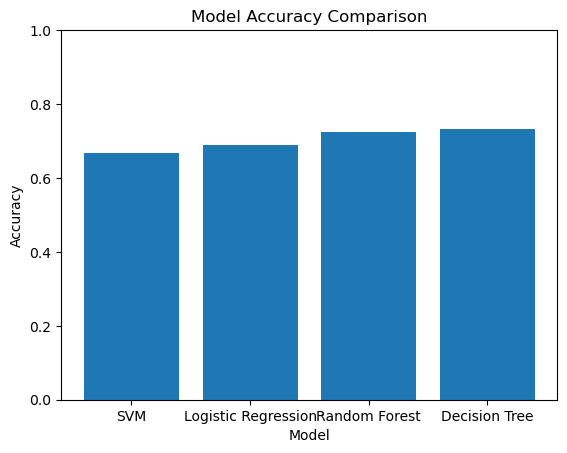

In [188]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

# Calculate the accuracy of multiple models
lr_acc = accuracy_score(y4_test, y4_predict2)
rf_clf_acc = accuracy_score(y3_test, y3_predict2)
svm_accuracy = accuracy_score(y1_test, y1_predict2)
decision_tree_acc = accuracy_score(y2_test, y2_predict2)


# Create a bar plot to compare the accuracy of multiple models
models = ['SVM','Logistic Regression','Random Forest', 'Decision Tree']
accuracies = [svm_accuracy,lr_acc,rf_clf_acc, decision_tree_acc]

plt.bar(range(len(models)), accuracies)
plt.xticks(range(len(models)), models)
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.ylim([0, 1])  # Set the y-axis limit to [0, 1]
plt.show()


In [ ]:
# decision tree has the highest accuracycompared to others which has predictive more true positives